In [ ]:
#Neural Networks Tend to OVERFIT !!!

In [ ]:
# 1. Choose the correct weight initialization algorithm which can satisfy your CL !!!!
# 2. Try tweaking LEARNING RATE !!!
# 3. Try Optimizing Learning Rate DYNAMICALLY !!!
# 4. Regularization
# 5. Try and Apply Momentum
# 6. Just CHange /Increase  the DATA !!!

# Weight Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [ ]:
data = pd.read_csv('LinearSep.csv')

In [ ]:
data.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,81,0
1,16,77,0
2,17,76,0
3,18,94,0
4,19,72,0


In [ ]:
data.label.value_counts()

1    35
0    22
Name: label, dtype: int64

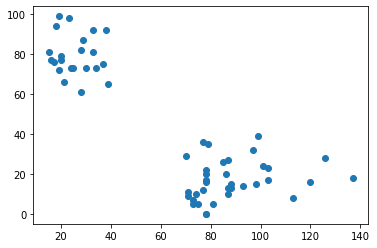

In [ ]:
plt.scatter(data['Annual Income (k$)'] , data['Spending Score (1-100)'])

In [ ]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scFeatures = StandardScaler()
features = scFeatures.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)

In [ ]:
# Weight Initialization Methods:
# 1. Zero Initialization -----------------------NEVER EVER EVER EVER use THIS ;)
# 1b. Constant Initialization
# 2. Random Initialization with Normal Distribution RandomNormal
# 3. Random INitialization with Uniform Distribution RandomUniform
# 4. Glorot Normal Initialization (Xavier Normal Initialization) ------- Default
# 5. Glorot Uniform INitialization (Xavier Uniform INitialization) GlorotUNiform

In [ ]:
# For Weight ---> kernel_initializer
# for Bias ----> bias_initializer

# 
model.add(tf.keras.layers.Dense( units = 12  , 
                                activation= 'relu' , 
                                kernel_initializer=tf.keras.initializers.Constant(0),
                                bias_initializers = tf.keras.initializers.GlorotUniform(),
                                input_shape= (2,) ))


# 1. Zero Initialization  -- NEVER USE IT

In [ ]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
            self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.Constant(0), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 2/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.6000 - val_loss: 0.6925 - val_accuracy: 0.6667
Epoch 3/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6928 - accuracy: 0.6000 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 4/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.6926 - accuracy: 0.6000 - val_loss: 0.6918 - val_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6923 - accuracy: 0.6000 - val_loss: 0.6915 - val_accuracy: 0.6667
Epoch 6/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6922 - accuracy: 0.6000 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 7/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6922 - accuracy: 0.6000 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 8/100

Epoch 59/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6844 - accuracy: 0.6000 - val_loss: 0.6775 - val_accuracy: 0.6667
Epoch 60/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6843 - accuracy: 0.6000 - val_loss: 0.6774 - val_accuracy: 0.6667
Epoch 61/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6842 - accuracy: 0.6000 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 62/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6841 - accuracy: 0.6000 - val_loss: 0.6770 - val_accuracy: 0.6667
Epoch 63/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6840 - accuracy: 0.6000 - val_loss: 0.6768 - val_accuracy: 0.6667
Epoch 64/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6839 - accuracy: 0.6000 - val_loss: 0.6765 - val_accuracy: 0.6667
Epoch 65/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6838 - accuracy: 0.6000 - val_loss: 0.6763 - val_accuracy: 0.6667
Epoch 

2/2 [==============================] - 0s 19ms/step - loss: 0.6793 - accuracy: 0.6000 - val_loss: 0.6673 - val_accuracy: 0.6667
Epoch 117/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6792 - accuracy: 0.6000 - val_loss: 0.6671 - val_accuracy: 0.6667
Epoch 118/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6792 - accuracy: 0.6000 - val_loss: 0.6670 - val_accuracy: 0.6667
Epoch 119/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6792 - accuracy: 0.6000 - val_loss: 0.6667 - val_accuracy: 0.6667
Epoch 120/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6790 - accuracy: 0.6000 - val_loss: 0.6665 - val_accuracy: 0.6667
Epoch 121/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6789 - accuracy: 0.6000 - val_loss: 0.6663 - val_accuracy: 0.6667
Epoch 122/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6788 - accuracy: 0.6000 - val_loss: 0.6662 - val_accuracy: 0.6667
Epoch 123/1000

2/2 [==============================] - 0s 21ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.6606 - val_accuracy: 0.6667
Epoch 174/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.6606 - val_accuracy: 0.6667
Epoch 175/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.6607 - val_accuracy: 0.6667
Epoch 176/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6765 - accuracy: 0.6000 - val_loss: 0.6606 - val_accuracy: 0.6667
Epoch 177/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6764 - accuracy: 0.6000 - val_loss: 0.6605 - val_accuracy: 0.6667
Epoch 178/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6764 - accuracy: 0.6000 - val_loss: 0.6605 - val_accuracy: 0.6667
Epoch 179/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6764 - accuracy: 0.6000 - val_loss: 0.6605 - val_accuracy: 0.6667
Epoch 180/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 231/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 232/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6564 - val_accuracy: 0.6667
Epoch 233/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6564 - val_accuracy: 0.6667
Epoch 234/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6564 - val_accuracy: 0.6667
Epoch 235/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6750 - accuracy: 0.6000 - val_loss: 0.6563 - val_accuracy: 0.6667
Epoch 236/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6749 - accuracy: 0.6000 - val_loss: 0.6563 - val_accuracy: 0.6667
Epoch 237/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6541 - val_accuracy: 0.6667
Epoch 288/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6540 - val_accuracy: 0.6667
Epoch 289/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6540 - val_accuracy: 0.6667
Epoch 290/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6539 - val_accuracy: 0.6667
Epoch 291/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6742 - accuracy: 0.6000 - val_loss: 0.6539 - val_accuracy: 0.6667
Epoch 292/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6538 - val_accuracy: 0.6667
Epoch 293/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6742 - accuracy: 0.6000 - val_loss: 0.6537 - val_accuracy: 0.6667
Epoch 294/1000

2/2 [==============================] - 0s 20ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.6521 - val_accuracy: 0.6667
Epoch 345/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 346/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 347/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.6518 - val_accuracy: 0.6667
Epoch 348/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6737 - accuracy: 0.6000 - val_loss: 0.6517 - val_accuracy: 0.6667
Epoch 349/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6739 - accuracy: 0.6000 - val_loss: 0.6519 - val_accuracy: 0.6667
Epoch 350/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6738 - accuracy: 0.6000 - val_loss: 0.6519 - val_accuracy: 0.6667
Epoch 351/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.6734 - accuracy: 0.6000 - val_loss: 0.6497 - val_accuracy: 0.6667
Epoch 402/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.6498 - val_accuracy: 0.6667
Epoch 403/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.6497 - val_accuracy: 0.6667
Epoch 404/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.6497 - val_accuracy: 0.6667
Epoch 405/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6734 - accuracy: 0.6000 - val_loss: 0.6499 - val_accuracy: 0.6667
Epoch 406/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6734 - accuracy: 0.6000 - val_loss: 0.6499 - val_accuracy: 0.6667
Epoch 407/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6734 - accuracy: 0.6000 - val_loss: 0.6498 - val_accuracy: 0.6667
Epoch 408/1000

2/2 [==============================] - 0s 22ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 459/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 460/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 461/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 462/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 463/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6484 - val_accuracy: 0.6667
Epoch 464/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6484 - val_accuracy: 0.6667
Epoch 465/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 516/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6480 - val_accuracy: 0.6667
Epoch 517/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 518/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 519/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 520/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6478 - val_accuracy: 0.6667
Epoch 521/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 522/1000

2/2 [==============================] - 0s 21ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6474 - val_accuracy: 0.6667
Epoch 573/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 574/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 575/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 576/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 577/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 578/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 579/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6468 - val_accuracy: 0.6667
Epoch 630/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 631/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6468 - val_accuracy: 0.6667
Epoch 632/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 633/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 634/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 635/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6467 - val_accuracy: 0.6667
Epoch 636/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 687/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 688/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 689/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 690/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 691/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 692/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 693/1000

2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6466 - val_accuracy: 0.6667
Epoch 744/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6466 - val_accuracy: 0.6667
Epoch 745/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 746/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 747/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 748/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 749/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 750/1000

2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6463 - val_accuracy: 0.6667
Epoch 801/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 802/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 803/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 804/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 805/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 806/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 807/1000

2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 858/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 859/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 860/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 861/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 862/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 863/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 864/1000

2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 915/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 916/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 917/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 918/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 919/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6460 - val_accuracy: 0.6667
Epoch 920/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6459 - val_accuracy: 0.6667
Epoch 921/1000

2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 972/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6463 - val_accuracy: 0.6667
Epoch 973/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6463 - val_accuracy: 0.6667
Epoch 974/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 975/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6464 - val_accuracy: 0.6667
Epoch 976/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6731 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 977/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6730 - accuracy: 0.6000 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 978/1000

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.Constant(0.1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.2), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.05), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.9), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 70ms/step - loss: 0.6658 - accuracy: 0.5333 - val_loss: 0.6707 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6114 - accuracy: 0.5778 - val_loss: 0.6495 - val_accuracy: 0.6667
Epoch 3/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5772 - accuracy: 0.6000 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch 4/1000
2/2 [==============================] - 0s 132ms/step - loss: 0.5565 - accuracy: 0.6000 - val_loss: 0.6261 - val_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5373 - accuracy: 0.5778 - val_loss: 0.6146 - val_accuracy: 0.6667
Epoch 6/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5179 - accuracy: 0.6000 - val_loss: 0.5961 - val_accuracy: 0.7500
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5008 - accuracy: 0.7778 - val_loss: 0.5795 - val_accuracy: 0.6667
Epoch 8/1000

# 2. Random Initialization with Normal Distribution

In [ ]:
np.random.randn()

-0.30335015954351485

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 70ms/step - loss: 5.6150 - accuracy: 0.4000 - val_loss: 2.9750 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.7161 - accuracy: 0.4000 - val_loss: 1.5164 - val_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3851 - accuracy: 0.4000 - val_loss: 0.7629 - val_accuracy: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6970 - accuracy: 0.4889 - val_loss: 0.3781 - val_accuracy: 1.0000


# 3. Random INitialization with Uniform Distribution

In [ ]:
np.random.rand()

0.41520193325672605

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 67ms/step - loss: 60.5284 - accuracy: 0.3333 - val_loss: 0.6244 - val_accuracy: 0.8333


# 3. Glorot Normal Initialization

In [ ]:
np.random.rand()

0.41520193325672605

In [ ]:
# Draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) 
#where fan_in is the number of input units in the weight tensor and 
#fan_out is the number of output units in the weight tensor.

#stddev = ?

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.8182 - accuracy: 0.4000 - val_loss: 0.7623 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7985 - accuracy: 0.4000 - val_loss: 0.7471 - val_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7816 - accuracy: 0.4000 - val_loss: 0.7349 - val_accuracy: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7673 - accuracy: 0.4000 - val_loss: 0.7253 - val_accuracy: 0.3333
Epoch 5/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7553 - accuracy: 0.4000 - val_loss: 0.7176 - val_accuracy: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7452 - accuracy: 0.4000 - val_loss: 0.7116 - val_accuracy: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7371 - accuracy: 0.4000 - val_loss: 0.7067 - val_accuracy: 0.3333
Epoch 8/1000


# 4. Glorot Uniform Initialization

In [ ]:
#Draws samples from a uniform distribution within [-limit, limit], 
#where limit = sqrt(6 / (fan_in + fan_out)) 
#(fan_in is the number of input units in the weight tensor and fan_out is the number of output units).

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.GlorotUniform(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.7050 - accuracy: 0.4000 - val_loss: 0.6991 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7033 - accuracy: 0.4000 - val_loss: 0.6974 - val_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7017 - accuracy: 0.4000 - val_loss: 0.6961 - val_accuracy: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7002 - accuracy: 0.4000 - val_loss: 0.6944 - val_accuracy: 0.3333
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6985 - accuracy: 0.4000 - val_loss: 0.6928 - val_accuracy: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6970 - accuracy: 0.4000 - val_loss: 0.6913 - val_accuracy: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6956 - accuracy: 0.4000 - val_loss: 0.6899 - val_accuracy: 0.3333
Epoch 8/1000


### In real life we get NON LINEAR PATHETIC DATASETS ;)

In [ ]:
from sklearn.datasets import make_circles
featuresNonLinear, labelNonLinear = make_circles(n_samples=100,factor=0.3,noise=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scFeatureNonLinear = StandardScaler()
featuresNonLinear = scFeatureNonLinear.fit_transform(featuresNonLinear)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(featuresNonLinear,
                                                labelNonLinear,
                                                test_size=0.2,
                                                random_state=10)

# 1. Zero Initialization  -- NEVER USE IT

In [ ]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
            self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.Constant(0), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.4500
Epoch 60/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 61/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 62/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.4500
Epoch 63/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 64/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 

3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6947 - val_accuracy: 0.4500
Epoch 117/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6947 - val_accuracy: 0.4500
Epoch 118/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 119/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 120/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 121/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 122/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6948 - val_accuracy: 0.4500
Epoch 123/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 174/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 175/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 177/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 178/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 180/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 231/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 232/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 233/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 235/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 236/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 237/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 288/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 289/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 290/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 291/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 292/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 293/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 294/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 345/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 346/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 347/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 348/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 350/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 351/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 402/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 403/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 404/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 405/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 406/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 407/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 408/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 459/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 460/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 461/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 462/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 464/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 465/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 516/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 517/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 518/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 519/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 521/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 522/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 573/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 574/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 575/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 576/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 577/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 578/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 579/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 630/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 631/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 632/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 633/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 634/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 635/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 636/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 687/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 688/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 689/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 690/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 691/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6964 - val_accuracy: 0.4500
Epoch 692/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6964 - val_accuracy: 0.4500
Epoch 693/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 744/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 745/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 746/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 747/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 748/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 749/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 750/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 801/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 802/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 803/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 804/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 805/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 806/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 807/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 858/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 859/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 860/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 861/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 862/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 863/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 864/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 915/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 916/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 917/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 918/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 919/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 920/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6959 - val_accuracy: 0.4500
Epoch 921/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 972/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 973/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 974/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 975/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 976/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 977/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 978/1000

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.Constant(0.1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.2), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.05), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.Constant(0.9), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 48ms/step - loss: 1.2113 - accuracy: 0.4750 - val_loss: 1.1748 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0219 - accuracy: 0.4500 - val_loss: 1.0146 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9086 - accuracy: 0.4500 - val_loss: 0.9313 - val_accuracy: 0.4500
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8498 - accuracy: 0.4375 - val_loss: 0.8745 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8112 - accuracy: 0.4625 - val_loss: 0.8360 - val_accuracy: 0.4000
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7874 - accuracy: 0.4750 - val_loss: 0.8111 - val_accuracy: 0.4000
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.7732 - accuracy: 0.4250 - val_loss: 0.7929 - val_accuracy: 0.3500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6824 - accuracy: 0.5125 - val_loss: 0.6814 - val_accuracy: 0.4500
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6820 - accuracy: 0.5125 - val_loss: 0.6807 - val_accuracy: 0.4500
Epoch 61/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6815 - accuracy: 0.5125 - val_loss: 0.6799 - val_accuracy: 0.4500
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6810 - accuracy: 0.5125 - val_loss: 0.6794 - val_accuracy: 0.4500
Epoch 63/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6806 - accuracy: 0.5125 - val_loss: 0.6786 - val_accuracy: 0.4500
Epoch 64/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6801 - accuracy: 0.5125 - val_loss: 0.6779 - val_accuracy: 0.4500
Epoch 65/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6797 - accuracy: 0.5125 - val_loss: 0.6772 - val_accuracy: 0.4500
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 0.6656 - accuracy: 0.5625 - val_loss: 0.6566 - val_accuracy: 0.6500
Epoch 117/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6652 - accuracy: 0.5750 - val_loss: 0.6564 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6649 - accuracy: 0.5625 - val_loss: 0.6562 - val_accuracy: 0.6500
Epoch 119/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6649 - accuracy: 0.5625 - val_loss: 0.6562 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6649 - accuracy: 0.5750 - val_loss: 0.6560 - val_accuracy: 0.6500
Epoch 121/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6651 - accuracy: 0.5625 - val_loss: 0.6559 - val_accuracy: 0.6500
Epoch 122/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6645 - accuracy: 0.5750 - val_loss: 0.6557 - val_accuracy: 0.6500
Epoch 123/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6609 - accuracy: 0.5625 - val_loss: 0.6508 - val_accuracy: 0.6500
Epoch 174/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6605 - accuracy: 0.5750 - val_loss: 0.6510 - val_accuracy: 0.6500
Epoch 175/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6605 - accuracy: 0.5750 - val_loss: 0.6512 - val_accuracy: 0.6500
Epoch 176/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6606 - accuracy: 0.5750 - val_loss: 0.6516 - val_accuracy: 0.6500
Epoch 177/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6604 - accuracy: 0.5750 - val_loss: 0.6511 - val_accuracy: 0.6500
Epoch 178/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6604 - accuracy: 0.5750 - val_loss: 0.6512 - val_accuracy: 0.6500
Epoch 179/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6604 - accuracy: 0.5750 - val_loss: 0.6510 - val_accuracy: 0.6500
Epoch 180/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6594 - accuracy: 0.5750 - val_loss: 0.6497 - val_accuracy: 0.6500
Epoch 231/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6496 - val_accuracy: 0.6500
Epoch 232/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6593 - accuracy: 0.5750 - val_loss: 0.6495 - val_accuracy: 0.6500
Epoch 233/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6592 - accuracy: 0.5750 - val_loss: 0.6499 - val_accuracy: 0.6500
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6592 - accuracy: 0.5750 - val_loss: 0.6502 - val_accuracy: 0.6500
Epoch 235/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6599 - accuracy: 0.5750 - val_loss: 0.6506 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6506 - val_accuracy: 0.6500
Epoch 237/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.6588 - accuracy: 0.5750 - val_loss: 0.6502 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6589 - accuracy: 0.5750 - val_loss: 0.6501 - val_accuracy: 0.6500
Epoch 289/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6588 - accuracy: 0.5750 - val_loss: 0.6506 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6592 - accuracy: 0.5750 - val_loss: 0.6491 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 292/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 293/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6497 - val_accuracy: 0.6500
Epoch 294/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6488 - val_accuracy: 0.6500
Epoch 345/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6588 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 347/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 348/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 349/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 350/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6589 - accuracy: 0.5750 - val_loss: 0.6478 - val_accuracy: 0.6500
Epoch 351/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6488 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6488 - val_accuracy: 0.6500
Epoch 404/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 405/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 406/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6495 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6497 - val_accuracy: 0.6500
Epoch 408/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6474 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 460/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 461/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6481 - val_accuracy: 0.6500
Epoch 462/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6594 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 464/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6586 - accuracy: 0.5750 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 465/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6471 - val_accuracy: 0.6500
Epoch 516/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6585 - accuracy: 0.5750 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 517/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0.5625 - val_loss: 0.6458 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6588 - accuracy: 0.5750 - val_loss: 0.6452 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6584 - accuracy: 0.5625 - val_loss: 0.6459 - val_accuracy: 0.6500
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 521/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6464 - val_accuracy: 0.6500
Epoch 522/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6455 - val_accuracy: 0.6500
Epoch 573/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6451 - val_accuracy: 0.6500
Epoch 574/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6587 - accuracy: 0.5625 - val_loss: 0.6459 - val_accuracy: 0.6500
Epoch 575/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6459 - val_accuracy: 0.6500
Epoch 576/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6580 - accuracy: 0.5750 - val_loss: 0.6457 - val_accuracy: 0.6500
Epoch 577/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6451 - val_accuracy: 0.6500
Epoch 578/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6453 - val_accuracy: 0.6500
Epoch 579/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 630/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6590 - accuracy: 0.5750 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 631/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6465 - val_accuracy: 0.6500
Epoch 632/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6471 - val_accuracy: 0.6500
Epoch 633/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6588 - accuracy: 0.5750 - val_loss: 0.6459 - val_accuracy: 0.6500
Epoch 634/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 635/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6464 - val_accuracy: 0.6500
Epoch 636/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 687/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6589 - accuracy: 0.5750 - val_loss: 0.6492 - val_accuracy: 0.6500
Epoch 688/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6492 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 690/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6468 - val_accuracy: 0.6500
Epoch 691/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6474 - val_accuracy: 0.6500
Epoch 692/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6471 - val_accuracy: 0.6500
Epoch 693/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6471 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6590 - accuracy: 0.5750 - val_loss: 0.6478 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6594 - accuracy: 0.5750 - val_loss: 0.6488 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6483 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6587 - accuracy: 0.5750 - val_loss: 0.6472 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6482 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6580 - accuracy: 0.5750 - val_loss: 0.6483 - val_accuracy: 0.6500
Epoch 802/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6476 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6470 - val_accuracy: 0.6500
Epoch 804/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6469 - val_accuracy: 0.6500
Epoch 805/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6579 - accuracy: 0.5750 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 806/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6587 - accuracy: 0.5750 - val_loss: 0.6452 - val_accuracy: 0.6500
Epoch 807/1000

Epoch 857/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6469 - val_accuracy: 0.6500
Epoch 858/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6590 - accuracy: 0.5625 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 859/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6475 - val_accuracy: 0.6500
Epoch 860/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6579 - accuracy: 0.5750 - val_loss: 0.6474 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6586 - accuracy: 0.5750 - val_loss: 0.6476 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5750 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 863/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6581 - accuracy: 0.5625 - val_loss: 0.6463 - val_accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6487 - val_accuracy: 0.6500
Epoch 915/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6483 - val_accuracy: 0.6500
Epoch 916/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6582 - accuracy: 0.5625 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 917/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.5625 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 918/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6583 - accuracy: 0.5750 - val_loss: 0.6482 - val_accuracy: 0.6500
Epoch 919/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6591 - accuracy: 0.5750 - val_loss: 0.6482 - val_accuracy: 0.6500
Epoch 920/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6584 - accuracy: 0.5625 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 921/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6581 - accuracy: 0.5750 - val_loss: 0.6456 - val_accuracy: 0.6500
Epoch 972/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6457 - val_accuracy: 0.6500
Epoch 973/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6587 - accuracy: 0.5750 - val_loss: 0.6453 - val_accuracy: 0.6500
Epoch 974/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6580 - accuracy: 0.5750 - val_loss: 0.6453 - val_accuracy: 0.6500
Epoch 975/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6582 - accuracy: 0.5625 - val_loss: 0.6460 - val_accuracy: 0.6500
Epoch 976/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6582 - accuracy: 0.5750 - val_loss: 0.6456 - val_accuracy: 0.6500
Epoch 977/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6580 - accuracy: 0.5750 - val_loss: 0.6455 - val_accuracy: 0.6500
Epoch 978/1000

# 2. Random Initialization with Normal Distribution

In [ ]:
np.random.randn()

-0.30335015954351485

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomNormal(mean =0 , stddev=1), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 48ms/step - loss: 2.8870 - accuracy: 0.5125 - val_loss: 1.1718 - val_accuracy: 0.5500
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.3877 - accuracy: 0.5250 - val_loss: 0.8224 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8920 - accuracy: 0.5250 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.7410 - accuracy: 0.5750 - val_loss: 0.7086 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7012 - accuracy: 0.5875 - val_loss: 0.7076 - val_accuracy: 0.4500
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7128 - accuracy: 0.5500 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6913 - accuracy: 0.5750 - val_loss: 0.7188 - val_accuracy: 0.5000
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5701 - accuracy: 0.6750 - val_loss: 0.7286 - val_accuracy: 0.5500
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5708 - accuracy: 0.7000 - val_loss: 0.7302 - val_accuracy: 0.5500
Epoch 61/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5810 - accuracy: 0.6750 - val_loss: 0.7257 - val_accuracy: 0.5000
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5697 - accuracy: 0.6625 - val_loss: 0.7262 - val_accuracy: 0.5000
Epoch 63/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5841 - accuracy: 0.6500 - val_loss: 0.7530 - val_accuracy: 0.5500
Epoch 64/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5682 - accuracy: 0.6875 - val_loss: 0.7271 - val_accuracy: 0.5000
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5712 - accuracy: 0.7250 - val_loss: 0.7284 - val_accuracy: 0.5000
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 0.5233 - accuracy: 0.7500 - val_loss: 0.7145 - val_accuracy: 0.5500
Epoch 117/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5236 - accuracy: 0.7250 - val_loss: 0.7356 - val_accuracy: 0.5000
Epoch 118/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5319 - accuracy: 0.7875 - val_loss: 0.7181 - val_accuracy: 0.5500
Epoch 119/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5224 - accuracy: 0.7625 - val_loss: 0.7183 - val_accuracy: 0.5500
Epoch 120/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5182 - accuracy: 0.7750 - val_loss: 0.7196 - val_accuracy: 0.5500
Epoch 121/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.5236 - accuracy: 0.7625 - val_loss: 0.7343 - val_accuracy: 0.4500
Epoch 122/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5234 - accuracy: 0.7750 - val_loss: 0.7589 - val_accuracy: 0.6000
Epoch 123/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4748 - accuracy: 0.8125 - val_loss: 0.7232 - val_accuracy: 0.5500
Epoch 174/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4743 - accuracy: 0.8125 - val_loss: 0.7320 - val_accuracy: 0.5500
Epoch 175/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4742 - accuracy: 0.7875 - val_loss: 0.7292 - val_accuracy: 0.5500
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4736 - accuracy: 0.7625 - val_loss: 0.7216 - val_accuracy: 0.5500
Epoch 177/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5008 - accuracy: 0.7625 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 178/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4750 - accuracy: 0.8125 - val_loss: 0.7234 - val_accuracy: 0.5500
Epoch 179/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4721 - accuracy: 0.8125 - val_loss: 0.7300 - val_accuracy: 0.5500
Epoch 180/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4573 - accuracy: 0.8000 - val_loss: 0.7093 - val_accuracy: 0.6000
Epoch 231/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4519 - accuracy: 0.8250 - val_loss: 0.7581 - val_accuracy: 0.5500
Epoch 232/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4497 - accuracy: 0.8250 - val_loss: 0.7195 - val_accuracy: 0.5500
Epoch 233/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4443 - accuracy: 0.8250 - val_loss: 0.7051 - val_accuracy: 0.5500
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4541 - accuracy: 0.7875 - val_loss: 0.7113 - val_accuracy: 0.5500
Epoch 235/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4429 - accuracy: 0.8375 - val_loss: 0.7502 - val_accuracy: 0.5500
Epoch 236/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4646 - accuracy: 0.7875 - val_loss: 0.7449 - val_accuracy: 0.5500
Epoch 237/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4373 - accuracy: 0.8250 - val_loss: 0.7393 - val_accuracy: 0.5500
Epoch 288/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4336 - accuracy: 0.8250 - val_loss: 0.7535 - val_accuracy: 0.5500
Epoch 289/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4269 - accuracy: 0.8250 - val_loss: 0.7317 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4321 - accuracy: 0.8250 - val_loss: 0.7102 - val_accuracy: 0.6000
Epoch 291/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4406 - accuracy: 0.8250 - val_loss: 0.7460 - val_accuracy: 0.5500
Epoch 292/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4211 - accuracy: 0.8125 - val_loss: 0.7093 - val_accuracy: 0.6000
Epoch 293/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4355 - accuracy: 0.8125 - val_loss: 0.7565 - val_accuracy: 0.5500
Epoch 294/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4075 - accuracy: 0.8125 - val_loss: 0.7465 - val_accuracy: 0.5500
Epoch 345/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4122 - accuracy: 0.8125 - val_loss: 0.7242 - val_accuracy: 0.6000
Epoch 346/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4098 - accuracy: 0.8125 - val_loss: 0.7231 - val_accuracy: 0.6000
Epoch 347/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4227 - accuracy: 0.7875 - val_loss: 0.7884 - val_accuracy: 0.5500
Epoch 348/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4151 - accuracy: 0.8125 - val_loss: 0.7869 - val_accuracy: 0.5500
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4140 - accuracy: 0.8000 - val_loss: 0.7730 - val_accuracy: 0.5500
Epoch 350/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4264 - accuracy: 0.8125 - val_loss: 0.7755 - val_accuracy: 0.5500
Epoch 351/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4046 - accuracy: 0.7875 - val_loss: 0.8456 - val_accuracy: 0.6000
Epoch 402/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4252 - accuracy: 0.8000 - val_loss: 0.7973 - val_accuracy: 0.6000
Epoch 403/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3992 - accuracy: 0.8000 - val_loss: 0.7329 - val_accuracy: 0.6000
Epoch 404/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4029 - accuracy: 0.8000 - val_loss: 0.7748 - val_accuracy: 0.5500
Epoch 405/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4212 - accuracy: 0.8125 - val_loss: 0.7572 - val_accuracy: 0.5500
Epoch 406/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4020 - accuracy: 0.7875 - val_loss: 0.7354 - val_accuracy: 0.6000
Epoch 407/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3944 - accuracy: 0.8125 - val_loss: 0.7600 - val_accuracy: 0.5500
Epoch 408/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.3947 - accuracy: 0.8250 - val_loss: 0.7780 - val_accuracy: 0.6000
Epoch 459/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4177 - accuracy: 0.7750 - val_loss: 0.7902 - val_accuracy: 0.5500
Epoch 460/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4073 - accuracy: 0.7875 - val_loss: 0.7576 - val_accuracy: 0.5500
Epoch 461/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3830 - accuracy: 0.8250 - val_loss: 0.7428 - val_accuracy: 0.6000
Epoch 462/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3924 - accuracy: 0.7875 - val_loss: 0.7225 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4081 - accuracy: 0.8125 - val_loss: 0.7572 - val_accuracy: 0.5500
Epoch 464/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3868 - accuracy: 0.7875 - val_loss: 0.7413 - val_accuracy: 0.6000
Epoch 465/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.3725 - accuracy: 0.7875 - val_loss: 0.7412 - val_accuracy: 0.6000
Epoch 516/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3822 - accuracy: 0.7625 - val_loss: 0.7669 - val_accuracy: 0.5500
Epoch 517/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3802 - accuracy: 0.7500 - val_loss: 0.7959 - val_accuracy: 0.5500
Epoch 518/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3735 - accuracy: 0.8250 - val_loss: 0.7579 - val_accuracy: 0.6000
Epoch 519/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3810 - accuracy: 0.7875 - val_loss: 0.7659 - val_accuracy: 0.5500
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3863 - accuracy: 0.7875 - val_loss: 0.8037 - val_accuracy: 0.5500
Epoch 521/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3804 - accuracy: 0.8125 - val_loss: 0.7435 - val_accuracy: 0.5500
Epoch 522/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.3640 - accuracy: 0.8000 - val_loss: 0.7908 - val_accuracy: 0.5500
Epoch 573/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3720 - accuracy: 0.7750 - val_loss: 0.7381 - val_accuracy: 0.5500
Epoch 574/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3657 - accuracy: 0.7875 - val_loss: 0.7539 - val_accuracy: 0.6000
Epoch 575/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3665 - accuracy: 0.8000 - val_loss: 0.7366 - val_accuracy: 0.6500
Epoch 576/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3649 - accuracy: 0.8125 - val_loss: 0.7737 - val_accuracy: 0.5500
Epoch 577/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3667 - accuracy: 0.7875 - val_loss: 0.7413 - val_accuracy: 0.6000
Epoch 578/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.3656 - accuracy: 0.7750 - val_loss: 0.7517 - val_accuracy: 0.6000
Epoch 579/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.3613 - accuracy: 0.7875 - val_loss: 0.7873 - val_accuracy: 0.6000
Epoch 630/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3582 - accuracy: 0.7750 - val_loss: 0.8076 - val_accuracy: 0.6500
Epoch 631/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3918 - accuracy: 0.8125 - val_loss: 0.8498 - val_accuracy: 0.6000
Epoch 632/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3760 - accuracy: 0.7750 - val_loss: 0.8051 - val_accuracy: 0.5500
Epoch 633/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3539 - accuracy: 0.7750 - val_loss: 0.8084 - val_accuracy: 0.6000
Epoch 634/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3877 - accuracy: 0.7875 - val_loss: 0.7844 - val_accuracy: 0.6000
Epoch 635/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3657 - accuracy: 0.8000 - val_loss: 0.8467 - val_accuracy: 0.6000
Epoch 636/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.3551 - accuracy: 0.7875 - val_loss: 0.7927 - val_accuracy: 0.6000
Epoch 687/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3559 - accuracy: 0.8000 - val_loss: 0.8146 - val_accuracy: 0.6000
Epoch 688/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3521 - accuracy: 0.8125 - val_loss: 0.8095 - val_accuracy: 0.6000
Epoch 689/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3484 - accuracy: 0.8125 - val_loss: 0.8256 - val_accuracy: 0.5500
Epoch 690/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3502 - accuracy: 0.7875 - val_loss: 0.8076 - val_accuracy: 0.6000
Epoch 691/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3460 - accuracy: 0.8125 - val_loss: 0.8114 - val_accuracy: 0.6000
Epoch 692/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3488 - accuracy: 0.8125 - val_loss: 0.8226 - val_accuracy: 0.5500
Epoch 693/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.3558 - accuracy: 0.8250 - val_loss: 0.8175 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3478 - accuracy: 0.8375 - val_loss: 0.8099 - val_accuracy: 0.6000
Epoch 745/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3350 - accuracy: 0.8125 - val_loss: 0.8033 - val_accuracy: 0.6000
Epoch 746/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3398 - accuracy: 0.8125 - val_loss: 0.8404 - val_accuracy: 0.5500
Epoch 747/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3478 - accuracy: 0.7875 - val_loss: 0.8290 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3500 - accuracy: 0.8250 - val_loss: 0.8139 - val_accuracy: 0.6000
Epoch 749/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3465 - accuracy: 0.7875 - val_loss: 0.9297 - val_accuracy: 0.6000
Epoch 750/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.3364 - accuracy: 0.8125 - val_loss: 0.8270 - val_accuracy: 0.5500
Epoch 801/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3460 - accuracy: 0.7750 - val_loss: 0.9018 - val_accuracy: 0.5500
Epoch 802/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3377 - accuracy: 0.8375 - val_loss: 0.8323 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3274 - accuracy: 0.8375 - val_loss: 0.9051 - val_accuracy: 0.5500
Epoch 804/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3358 - accuracy: 0.8500 - val_loss: 0.8606 - val_accuracy: 0.6000
Epoch 805/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3330 - accuracy: 0.8250 - val_loss: 0.8179 - val_accuracy: 0.6000
Epoch 806/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3466 - accuracy: 0.8250 - val_loss: 0.8052 - val_accuracy: 0.5500
Epoch 807/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.3312 - accuracy: 0.8000 - val_loss: 0.8203 - val_accuracy: 0.6500
Epoch 858/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3437 - accuracy: 0.8500 - val_loss: 0.8140 - val_accuracy: 0.6000
Epoch 859/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.3241 - accuracy: 0.8375 - val_loss: 0.8820 - val_accuracy: 0.5500
Epoch 860/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.3437 - accuracy: 0.8250 - val_loss: 0.8424 - val_accuracy: 0.6000
Epoch 861/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.3343 - accuracy: 0.8000 - val_loss: 0.8465 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3269 - accuracy: 0.8250 - val_loss: 0.8891 - val_accuracy: 0.5500
Epoch 863/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3252 - accuracy: 0.8250 - val_loss: 0.8252 - val_accuracy: 0.6000
Epoch 864/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.3461 - accuracy: 0.7875 - val_loss: 0.8502 - val_accuracy: 0.6000
Epoch 915/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.3366 - accuracy: 0.8250 - val_loss: 0.8496 - val_accuracy: 0.6000
Epoch 916/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3258 - accuracy: 0.8250 - val_loss: 0.8522 - val_accuracy: 0.6000
Epoch 917/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3158 - accuracy: 0.8250 - val_loss: 0.8672 - val_accuracy: 0.6000
Epoch 918/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3568 - accuracy: 0.8125 - val_loss: 0.8433 - val_accuracy: 0.6000
Epoch 919/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3126 - accuracy: 0.8625 - val_loss: 0.9210 - val_accuracy: 0.5500
Epoch 920/1000
3/3 [==============================] - 0s 106ms/step - loss: 0.3265 - accuracy: 0.8125 - val_loss: 0.8403 - val_accuracy: 0.5500
Epoch 921/100

3/3 [==============================] - 0s 19ms/step - loss: 0.3259 - accuracy: 0.8625 - val_loss: 0.9682 - val_accuracy: 0.6000
Epoch 972/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3326 - accuracy: 0.8375 - val_loss: 0.8799 - val_accuracy: 0.5500
Epoch 973/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3193 - accuracy: 0.8125 - val_loss: 0.9138 - val_accuracy: 0.5500
Epoch 974/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.3205 - accuracy: 0.8500 - val_loss: 0.8808 - val_accuracy: 0.6000
Epoch 975/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3207 - accuracy: 0.8250 - val_loss: 0.8889 - val_accuracy: 0.6000
Epoch 976/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3179 - accuracy: 0.8125 - val_loss: 0.9640 - val_accuracy: 0.5000
Epoch 977/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.3467 - accuracy: 0.8375 - val_loss: 0.9223 - val_accuracy: 0.6000
Epoch 978/1000

# 3. Random INitialization with Uniform Distribution

In [ ]:
np.random.rand()

0.41520193325672605

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=1), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 49ms/step - loss: 117.5826 - accuracy: 0.4625 - val_loss: 14.0322 - val_accuracy: 0.6500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 5.8081 - accuracy: 0.6125 - val_loss: 4.2207 - val_accuracy: 0.6500
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 2.7221 - accuracy: 0.6250 - val_loss: 1.7977 - val_accuracy: 0.7000
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.1569 - accuracy: 0.6000 - val_loss: 1.4889 - val_accuracy: 0.6500
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8142 - accuracy: 0.5875 - val_loss: 1.3459 - val_accuracy: 0.6000
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6382 - accuracy: 0.5875 - val_loss: 1.3758 - val_accuracy: 0.6000
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6202 - accuracy: 0.5875 - val_loss: 1.4529 - val_accuracy: 0.6000
Epoch 8/10

Epoch 59/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6037 - accuracy: 0.6125 - val_loss: 1.6589 - val_accuracy: 0.6000
Epoch 60/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6037 - accuracy: 0.6125 - val_loss: 1.6609 - val_accuracy: 0.6000
Epoch 61/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6037 - accuracy: 0.6125 - val_loss: 1.6618 - val_accuracy: 0.6000
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6037 - accuracy: 0.6125 - val_loss: 1.6626 - val_accuracy: 0.6000
Epoch 63/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6037 - accuracy: 0.6125 - val_loss: 1.6644 - val_accuracy: 0.6000
Epoch 64/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6036 - accuracy: 0.6125 - val_loss: 1.6653 - val_accuracy: 0.6000
Epoch 65/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6036 - accuracy: 0.6125 - val_loss: 1.6661 - val_accuracy: 0.6000
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 0.6023 - accuracy: 0.6125 - val_loss: 1.6999 - val_accuracy: 0.6500
Epoch 117/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6022 - accuracy: 0.6125 - val_loss: 1.7003 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6022 - accuracy: 0.6125 - val_loss: 1.7006 - val_accuracy: 0.6500
Epoch 119/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6022 - accuracy: 0.6125 - val_loss: 1.7010 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6022 - accuracy: 0.6125 - val_loss: 1.7014 - val_accuracy: 0.6500
Epoch 121/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6021 - accuracy: 0.6125 - val_loss: 1.7017 - val_accuracy: 0.6500
Epoch 122/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6021 - accuracy: 0.6125 - val_loss: 1.7021 - val_accuracy: 0.6500
Epoch 123/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7221 - val_accuracy: 0.6500
Epoch 174/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7225 - val_accuracy: 0.6500
Epoch 175/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7227 - val_accuracy: 0.6500
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7228 - val_accuracy: 0.6500
Epoch 177/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7229 - val_accuracy: 0.6500
Epoch 178/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6014 - accuracy: 0.6125 - val_loss: 1.7236 - val_accuracy: 0.6500
Epoch 179/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6015 - accuracy: 0.6125 - val_loss: 1.7240 - val_accuracy: 0.6500
Epoch 180/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7368 - val_accuracy: 0.6500
Epoch 231/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7369 - val_accuracy: 0.6500
Epoch 232/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7372 - val_accuracy: 0.6500
Epoch 233/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7373 - val_accuracy: 0.6500
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7374 - val_accuracy: 0.6500
Epoch 235/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7377 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6011 - accuracy: 0.6125 - val_loss: 1.7379 - val_accuracy: 0.6500
Epoch 237/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7476 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6010 - accuracy: 0.6125 - val_loss: 1.7481 - val_accuracy: 0.6500
Epoch 289/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6010 - accuracy: 0.6125 - val_loss: 1.7481 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7484 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7485 - val_accuracy: 0.6500
Epoch 292/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7487 - val_accuracy: 0.6500
Epoch 293/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7487 - val_accuracy: 0.6500
Epoch 294/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7564 - val_accuracy: 0.6500
Epoch 345/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7565 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7568 - val_accuracy: 0.6500
Epoch 347/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7570 - val_accuracy: 0.6500
Epoch 348/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7570 - val_accuracy: 0.6500
Epoch 349/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7572 - val_accuracy: 0.6500
Epoch 350/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7572 - val_accuracy: 0.6500
Epoch 351/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7640 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7640 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7640 - val_accuracy: 0.6500
Epoch 404/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7641 - val_accuracy: 0.6500
Epoch 405/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7642 - val_accuracy: 0.6500
Epoch 406/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7644 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7645 - val_accuracy: 0.6500
Epoch 408/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7716 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7716 - val_accuracy: 0.6500
Epoch 460/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7716 - val_accuracy: 0.6500
Epoch 461/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7719 - val_accuracy: 0.6500
Epoch 462/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7720 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7720 - val_accuracy: 0.6500
Epoch 464/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7720 - val_accuracy: 0.6500
Epoch 465/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7777 - val_accuracy: 0.6500
Epoch 516/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7777 - val_accuracy: 0.6500
Epoch 517/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7778 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7779 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7780 - val_accuracy: 0.6500
Epoch 520/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7781 - val_accuracy: 0.6500
Epoch 521/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7781 - val_accuracy: 0.6500
Epoch 522/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7836 - val_accuracy: 0.6500
Epoch 573/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7837 - val_accuracy: 0.6500
Epoch 574/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7838 - val_accuracy: 0.6500
Epoch 575/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7838 - val_accuracy: 0.6500
Epoch 576/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7840 - val_accuracy: 0.6500
Epoch 577/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7841 - val_accuracy: 0.6500
Epoch 578/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7841 - val_accuracy: 0.6500
Epoch 579/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7881 - val_accuracy: 0.6500
Epoch 630/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7883 - val_accuracy: 0.6500
Epoch 631/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7882 - val_accuracy: 0.6500
Epoch 632/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7884 - val_accuracy: 0.6500
Epoch 633/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7885 - val_accuracy: 0.6500
Epoch 634/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7885 - val_accuracy: 0.6500
Epoch 635/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7886 - val_accuracy: 0.6500
Epoch 636/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7932 - val_accuracy: 0.6500
Epoch 687/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7933 - val_accuracy: 0.6500
Epoch 688/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7933 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7934 - val_accuracy: 0.6500
Epoch 690/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.7934 - val_accuracy: 0.6500
Epoch 691/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7934 - val_accuracy: 0.6500
Epoch 692/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7935 - val_accuracy: 0.6500
Epoch 693/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7970 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7971 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7971 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7972 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7972 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7972 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.7974 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8015 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8015 - val_accuracy: 0.6500
Epoch 802/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8015 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8015 - val_accuracy: 0.6500
Epoch 804/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8016 - val_accuracy: 0.6500
Epoch 805/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8016 - val_accuracy: 0.6500
Epoch 806/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8017 - val_accuracy: 0.6500
Epoch 807/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8053 - val_accuracy: 0.6500
Epoch 858/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8054 - val_accuracy: 0.6500
Epoch 859/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6009 - accuracy: 0.6125 - val_loss: 1.8054 - val_accuracy: 0.6500
Epoch 860/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8054 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8055 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8056 - val_accuracy: 0.6500
Epoch 863/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8055 - val_accuracy: 0.6500
Epoch 864/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8093 - val_accuracy: 0.7000
Epoch 915/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8094 - val_accuracy: 0.7000
Epoch 916/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8093 - val_accuracy: 0.7000
Epoch 917/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8095 - val_accuracy: 0.7000
Epoch 918/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8095 - val_accuracy: 0.7000
Epoch 919/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8096 - val_accuracy: 0.7000
Epoch 920/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8096 - val_accuracy: 0.7000
Epoch 921/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8124 - val_accuracy: 0.6500
Epoch 972/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8125 - val_accuracy: 0.6500
Epoch 973/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8126 - val_accuracy: 0.7000
Epoch 974/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8127 - val_accuracy: 0.7000
Epoch 975/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8127 - val_accuracy: 0.7000
Epoch 976/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8128 - val_accuracy: 0.7000
Epoch 977/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6008 - accuracy: 0.6125 - val_loss: 1.8128 - val_accuracy: 0.7000
Epoch 978/1000

# 3. Glorot Normal Initialization

In [ ]:
np.random.rand()

0.41520193325672605

In [ ]:
# Draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) 
#where fan_in is the number of input units in the weight tensor and 
#fan_out is the number of output units in the weight tensor.

#stddev = ?

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 53ms/step - loss: 0.6921 - accuracy: 0.5500 - val_loss: 0.6941 - val_accuracy: 0.3500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6919 - accuracy: 0.5750 - val_loss: 0.6942 - val_accuracy: 0.3500
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6918 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.2500
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.2500
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6915 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.3000
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6914 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6913 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.3500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6862 - accuracy: 0.5125 - val_loss: 0.6929 - val_accuracy: 0.4500
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6860 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.4500
Epoch 61/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6859 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.4500
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.5125 - val_loss: 0.6926 - val_accuracy: 0.4500
Epoch 63/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6857 - accuracy: 0.5125 - val_loss: 0.6926 - val_accuracy: 0.4500
Epoch 64/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6856 - accuracy: 0.5125 - val_loss: 0.6926 - val_accuracy: 0.4500
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6855 - accuracy: 0.5125 - val_loss: 0.6926 - val_accuracy: 0.4500
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 0.6795 - accuracy: 0.5125 - val_loss: 0.6898 - val_accuracy: 0.4500
Epoch 117/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6793 - accuracy: 0.5125 - val_loss: 0.6896 - val_accuracy: 0.4500
Epoch 118/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6793 - accuracy: 0.5125 - val_loss: 0.6896 - val_accuracy: 0.4500
Epoch 119/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6790 - accuracy: 0.5125 - val_loss: 0.6895 - val_accuracy: 0.4500
Epoch 120/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6790 - accuracy: 0.5125 - val_loss: 0.6894 - val_accuracy: 0.4500
Epoch 121/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6788 - accuracy: 0.5125 - val_loss: 0.6893 - val_accuracy: 0.4500
Epoch 122/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6788 - accuracy: 0.5125 - val_loss: 0.6892 - val_accuracy: 0.4500
Epoch 123/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6702 - accuracy: 0.6250 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 174/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6700 - accuracy: 0.6250 - val_loss: 0.6836 - val_accuracy: 0.5500
Epoch 175/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6698 - accuracy: 0.6000 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6697 - accuracy: 0.6250 - val_loss: 0.6832 - val_accuracy: 0.5500
Epoch 177/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6694 - accuracy: 0.6125 - val_loss: 0.6832 - val_accuracy: 0.5500
Epoch 178/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6692 - accuracy: 0.6000 - val_loss: 0.6830 - val_accuracy: 0.5500
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6690 - accuracy: 0.6125 - val_loss: 0.6830 - val_accuracy: 0.5500
Epoch 180/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.6577 - accuracy: 0.6000 - val_loss: 0.6750 - val_accuracy: 0.6500
Epoch 231/1000
3/3 [==============================] - 0s 107ms/step - loss: 0.6573 - accuracy: 0.6000 - val_loss: 0.6748 - val_accuracy: 0.6500
Epoch 232/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6570 - accuracy: 0.6000 - val_loss: 0.6746 - val_accuracy: 0.6500
Epoch 233/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6568 - accuracy: 0.6000 - val_loss: 0.6744 - val_accuracy: 0.6500
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6568 - accuracy: 0.6000 - val_loss: 0.6743 - val_accuracy: 0.6500
Epoch 235/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6562 - accuracy: 0.6000 - val_loss: 0.6742 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6560 - accuracy: 0.6000 - val_loss: 0.6740 - val_accuracy: 0.6500
Epoch 237/100

3/3 [==============================] - 0s 17ms/step - loss: 0.6406 - accuracy: 0.6000 - val_loss: 0.6649 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6404 - accuracy: 0.6000 - val_loss: 0.6645 - val_accuracy: 0.6500
Epoch 289/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6400 - accuracy: 0.6000 - val_loss: 0.6643 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6397 - accuracy: 0.6000 - val_loss: 0.6641 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6395 - accuracy: 0.6000 - val_loss: 0.6639 - val_accuracy: 0.6500
Epoch 292/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6391 - accuracy: 0.6000 - val_loss: 0.6638 - val_accuracy: 0.6500
Epoch 293/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6387 - accuracy: 0.6000 - val_loss: 0.6635 - val_accuracy: 0.6500
Epoch 294/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6221 - accuracy: 0.6375 - val_loss: 0.6542 - val_accuracy: 0.6500
Epoch 345/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6218 - accuracy: 0.6500 - val_loss: 0.6542 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6215 - accuracy: 0.6500 - val_loss: 0.6540 - val_accuracy: 0.6500
Epoch 347/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6212 - accuracy: 0.6500 - val_loss: 0.6537 - val_accuracy: 0.6500
Epoch 348/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6209 - accuracy: 0.6500 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 349/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6206 - accuracy: 0.6375 - val_loss: 0.6532 - val_accuracy: 0.6500
Epoch 350/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6203 - accuracy: 0.6375 - val_loss: 0.6531 - val_accuracy: 0.6500
Epoch 351/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6043 - accuracy: 0.6500 - val_loss: 0.6466 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6038 - accuracy: 0.6500 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6034 - accuracy: 0.6500 - val_loss: 0.6462 - val_accuracy: 0.6500
Epoch 404/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6031 - accuracy: 0.6500 - val_loss: 0.6461 - val_accuracy: 0.6500
Epoch 405/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6027 - accuracy: 0.6500 - val_loss: 0.6460 - val_accuracy: 0.6500
Epoch 406/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6026 - accuracy: 0.6500 - val_loss: 0.6461 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6021 - accuracy: 0.6500 - val_loss: 0.6459 - val_accuracy: 0.6500
Epoch 408/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.5863 - accuracy: 0.6625 - val_loss: 0.6407 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5860 - accuracy: 0.6625 - val_loss: 0.6406 - val_accuracy: 0.6500
Epoch 460/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5856 - accuracy: 0.6625 - val_loss: 0.6405 - val_accuracy: 0.6500
Epoch 461/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5853 - accuracy: 0.6625 - val_loss: 0.6404 - val_accuracy: 0.6500
Epoch 462/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5849 - accuracy: 0.6625 - val_loss: 0.6404 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5845 - accuracy: 0.6625 - val_loss: 0.6401 - val_accuracy: 0.6500
Epoch 464/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5846 - accuracy: 0.6625 - val_loss: 0.6400 - val_accuracy: 0.6500
Epoch 465/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.5720 - accuracy: 0.6750 - val_loss: 0.6387 - val_accuracy: 0.6500
Epoch 516/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5717 - accuracy: 0.6750 - val_loss: 0.6387 - val_accuracy: 0.6500
Epoch 517/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5714 - accuracy: 0.6750 - val_loss: 0.6388 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5710 - accuracy: 0.6750 - val_loss: 0.6386 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5709 - accuracy: 0.6750 - val_loss: 0.6380 - val_accuracy: 0.6500
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5707 - accuracy: 0.6875 - val_loss: 0.6375 - val_accuracy: 0.6500
Epoch 521/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5704 - accuracy: 0.6875 - val_loss: 0.6373 - val_accuracy: 0.6500
Epoch 522/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.5574 - accuracy: 0.7125 - val_loss: 0.6353 - val_accuracy: 0.6500
Epoch 573/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5571 - accuracy: 0.7125 - val_loss: 0.6354 - val_accuracy: 0.6500
Epoch 574/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5570 - accuracy: 0.7125 - val_loss: 0.6354 - val_accuracy: 0.6500
Epoch 575/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5566 - accuracy: 0.7125 - val_loss: 0.6355 - val_accuracy: 0.6500
Epoch 576/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5564 - accuracy: 0.7125 - val_loss: 0.6355 - val_accuracy: 0.6500
Epoch 577/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5563 - accuracy: 0.7125 - val_loss: 0.6357 - val_accuracy: 0.6500
Epoch 578/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5560 - accuracy: 0.7125 - val_loss: 0.6354 - val_accuracy: 0.6500
Epoch 579/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.5437 - accuracy: 0.7125 - val_loss: 0.6320 - val_accuracy: 0.6500
Epoch 630/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5433 - accuracy: 0.7125 - val_loss: 0.6322 - val_accuracy: 0.6500
Epoch 631/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5430 - accuracy: 0.7250 - val_loss: 0.6325 - val_accuracy: 0.6500
Epoch 632/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5428 - accuracy: 0.7250 - val_loss: 0.6326 - val_accuracy: 0.6500
Epoch 633/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5428 - accuracy: 0.7125 - val_loss: 0.6331 - val_accuracy: 0.6500
Epoch 634/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.5423 - accuracy: 0.7250 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 635/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5422 - accuracy: 0.7125 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 636/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.5293 - accuracy: 0.7375 - val_loss: 0.6301 - val_accuracy: 0.6500
Epoch 687/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5292 - accuracy: 0.7375 - val_loss: 0.6303 - val_accuracy: 0.6500
Epoch 688/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5292 - accuracy: 0.7250 - val_loss: 0.6308 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5285 - accuracy: 0.7250 - val_loss: 0.6314 - val_accuracy: 0.6500
Epoch 690/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5283 - accuracy: 0.7250 - val_loss: 0.6313 - val_accuracy: 0.6500
Epoch 691/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5281 - accuracy: 0.7250 - val_loss: 0.6304 - val_accuracy: 0.6500
Epoch 692/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5277 - accuracy: 0.7250 - val_loss: 0.6297 - val_accuracy: 0.6500
Epoch 693/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.5159 - accuracy: 0.7500 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5154 - accuracy: 0.7375 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5152 - accuracy: 0.7500 - val_loss: 0.6337 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5149 - accuracy: 0.7500 - val_loss: 0.6339 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5147 - accuracy: 0.7500 - val_loss: 0.6338 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5145 - accuracy: 0.7500 - val_loss: 0.6338 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5143 - accuracy: 0.7500 - val_loss: 0.6333 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.5045 - accuracy: 0.7625 - val_loss: 0.6403 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5044 - accuracy: 0.7625 - val_loss: 0.6399 - val_accuracy: 0.6500
Epoch 802/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5042 - accuracy: 0.7625 - val_loss: 0.6408 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5049 - accuracy: 0.7625 - val_loss: 0.6416 - val_accuracy: 0.6500
Epoch 804/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5039 - accuracy: 0.7625 - val_loss: 0.6406 - val_accuracy: 0.6500
Epoch 805/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5037 - accuracy: 0.7625 - val_loss: 0.6404 - val_accuracy: 0.6500
Epoch 806/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.5040 - accuracy: 0.7625 - val_loss: 0.6403 - val_accuracy: 0.6500
Epoch 807/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.4945 - accuracy: 0.7875 - val_loss: 0.6451 - val_accuracy: 0.7000
Epoch 858/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4942 - accuracy: 0.7750 - val_loss: 0.6447 - val_accuracy: 0.7000
Epoch 859/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4939 - accuracy: 0.7875 - val_loss: 0.6443 - val_accuracy: 0.7000
Epoch 860/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.4943 - accuracy: 0.7875 - val_loss: 0.6431 - val_accuracy: 0.7000
Epoch 861/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4939 - accuracy: 0.7750 - val_loss: 0.6441 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4936 - accuracy: 0.7875 - val_loss: 0.6437 - val_accuracy: 0.7000
Epoch 863/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4934 - accuracy: 0.7875 - val_loss: 0.6450 - val_accuracy: 0.6500
Epoch 864/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4843 - accuracy: 0.7875 - val_loss: 0.6600 - val_accuracy: 0.7000
Epoch 915/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4837 - accuracy: 0.8000 - val_loss: 0.6588 - val_accuracy: 0.7000
Epoch 916/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4839 - accuracy: 0.8000 - val_loss: 0.6582 - val_accuracy: 0.7000
Epoch 917/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4838 - accuracy: 0.8000 - val_loss: 0.6577 - val_accuracy: 0.7000
Epoch 918/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4834 - accuracy: 0.7875 - val_loss: 0.6576 - val_accuracy: 0.7000
Epoch 919/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4837 - accuracy: 0.7750 - val_loss: 0.6597 - val_accuracy: 0.7000
Epoch 920/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4831 - accuracy: 0.8000 - val_loss: 0.6596 - val_accuracy: 0.7000
Epoch 921/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4755 - accuracy: 0.8000 - val_loss: 0.6691 - val_accuracy: 0.7000
Epoch 972/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4759 - accuracy: 0.8000 - val_loss: 0.6713 - val_accuracy: 0.7000
Epoch 973/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4754 - accuracy: 0.8000 - val_loss: 0.6715 - val_accuracy: 0.7000
Epoch 974/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4759 - accuracy: 0.8000 - val_loss: 0.6732 - val_accuracy: 0.7000
Epoch 975/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4757 - accuracy: 0.7875 - val_loss: 0.6694 - val_accuracy: 0.7000
Epoch 976/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4759 - accuracy: 0.8000 - val_loss: 0.6684 - val_accuracy: 0.7000
Epoch 977/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4754 - accuracy: 0.8000 - val_loss: 0.6700 - val_accuracy: 0.7000
Epoch 978/1000

# 4. Glorot Uniform Initialization

In [ ]:
#Draws samples from a uniform distribution within [-limit, limit], 
#where limit = sqrt(6 / (fan_in + fan_out)) 
#(fan_in is the number of input units in the weight tensor and fan_out is the number of output units).

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.GlorotUniform(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotUniform(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.7156 - accuracy: 0.4875 - val_loss: 0.7091 - val_accuracy: 0.5500
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7152 - accuracy: 0.4750 - val_loss: 0.7088 - val_accuracy: 0.5500
Epoch 3/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7145 - accuracy: 0.4750 - val_loss: 0.7085 - val_accuracy: 0.5500
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.7139 - accuracy: 0.4625 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7133 - accuracy: 0.4625 - val_loss: 0.7079 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.7128 - accuracy: 0.4500 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7122 - accuracy: 0.4375 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6938 - accuracy: 0.5125 - val_loss: 0.6970 - val_accuracy: 0.4500
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.5125 - val_loss: 0.6968 - val_accuracy: 0.4500
Epoch 61/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6933 - accuracy: 0.5125 - val_loss: 0.6967 - val_accuracy: 0.4500
Epoch 62/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6964 - val_accuracy: 0.4500
Epoch 63/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 64/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6961 - val_accuracy: 0.4500
Epoch 65/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6923 - accuracy: 0.5125 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 

3/3 [==============================] - 0s 18ms/step - loss: 0.6831 - accuracy: 0.5125 - val_loss: 0.6879 - val_accuracy: 0.4500
Epoch 117/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6830 - accuracy: 0.5125 - val_loss: 0.6878 - val_accuracy: 0.4500
Epoch 118/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6828 - accuracy: 0.5125 - val_loss: 0.6878 - val_accuracy: 0.4500
Epoch 119/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6826 - accuracy: 0.5125 - val_loss: 0.6876 - val_accuracy: 0.4500
Epoch 120/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6824 - accuracy: 0.5125 - val_loss: 0.6874 - val_accuracy: 0.4500
Epoch 121/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6822 - accuracy: 0.5125 - val_loss: 0.6873 - val_accuracy: 0.4500
Epoch 122/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6820 - accuracy: 0.5125 - val_loss: 0.6872 - val_accuracy: 0.4500
Epoch 123/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6732 - accuracy: 0.5125 - val_loss: 0.6796 - val_accuracy: 0.4500
Epoch 174/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6730 - accuracy: 0.5125 - val_loss: 0.6794 - val_accuracy: 0.4500
Epoch 175/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6728 - accuracy: 0.5125 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 176/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6726 - accuracy: 0.5625 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 177/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6724 - accuracy: 0.5625 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 178/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6721 - accuracy: 0.5625 - val_loss: 0.6788 - val_accuracy: 0.5000
Epoch 179/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6719 - accuracy: 0.5625 - val_loss: 0.6787 - val_accuracy: 0.5000
Epoch 180/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.6599 - accuracy: 0.5875 - val_loss: 0.6703 - val_accuracy: 0.6000
Epoch 231/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6595 - accuracy: 0.5875 - val_loss: 0.6701 - val_accuracy: 0.6000
Epoch 232/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6592 - accuracy: 0.6000 - val_loss: 0.6699 - val_accuracy: 0.6000
Epoch 233/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6590 - accuracy: 0.6000 - val_loss: 0.6697 - val_accuracy: 0.6000
Epoch 234/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6587 - accuracy: 0.6000 - val_loss: 0.6695 - val_accuracy: 0.6000
Epoch 235/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6584 - accuracy: 0.6000 - val_loss: 0.6693 - val_accuracy: 0.6000
Epoch 236/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6581 - accuracy: 0.6000 - val_loss: 0.6691 - val_accuracy: 0.6000
Epoch 237/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6416 - accuracy: 0.7000 - val_loss: 0.6581 - val_accuracy: 0.6000
Epoch 288/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6412 - accuracy: 0.7000 - val_loss: 0.6578 - val_accuracy: 0.6000
Epoch 289/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6409 - accuracy: 0.7000 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 290/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6406 - accuracy: 0.7000 - val_loss: 0.6574 - val_accuracy: 0.6000
Epoch 291/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6402 - accuracy: 0.7000 - val_loss: 0.6571 - val_accuracy: 0.6000
Epoch 292/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6399 - accuracy: 0.7000 - val_loss: 0.6569 - val_accuracy: 0.6000
Epoch 293/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6394 - accuracy: 0.7000 - val_loss: 0.6566 - val_accuracy: 0.6000
Epoch 294/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.6190 - accuracy: 0.6875 - val_loss: 0.6435 - val_accuracy: 0.6000
Epoch 345/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6185 - accuracy: 0.6875 - val_loss: 0.6433 - val_accuracy: 0.6000
Epoch 346/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6183 - accuracy: 0.6875 - val_loss: 0.6428 - val_accuracy: 0.6000
Epoch 347/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6176 - accuracy: 0.6875 - val_loss: 0.6426 - val_accuracy: 0.6000
Epoch 348/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6172 - accuracy: 0.6875 - val_loss: 0.6425 - val_accuracy: 0.6000
Epoch 349/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6167 - accuracy: 0.6875 - val_loss: 0.6423 - val_accuracy: 0.6000
Epoch 350/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6162 - accuracy: 0.6875 - val_loss: 0.6421 - val_accuracy: 0.6000
Epoch 351/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.5924 - accuracy: 0.7250 - val_loss: 0.6287 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5918 - accuracy: 0.7250 - val_loss: 0.6284 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5914 - accuracy: 0.7250 - val_loss: 0.6284 - val_accuracy: 0.6500
Epoch 404/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5908 - accuracy: 0.7250 - val_loss: 0.6283 - val_accuracy: 0.6500
Epoch 405/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5903 - accuracy: 0.7250 - val_loss: 0.6281 - val_accuracy: 0.6500
Epoch 406/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5898 - accuracy: 0.7250 - val_loss: 0.6279 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5895 - accuracy: 0.7250 - val_loss: 0.6274 - val_accuracy: 0.6500
Epoch 408/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.5654 - accuracy: 0.7500 - val_loss: 0.6157 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5649 - accuracy: 0.7500 - val_loss: 0.6150 - val_accuracy: 0.6500
Epoch 460/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5642 - accuracy: 0.7500 - val_loss: 0.6146 - val_accuracy: 0.6500
Epoch 461/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5638 - accuracy: 0.7500 - val_loss: 0.6140 - val_accuracy: 0.6500
Epoch 462/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5633 - accuracy: 0.7500 - val_loss: 0.6138 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5629 - accuracy: 0.7625 - val_loss: 0.6137 - val_accuracy: 0.6500
Epoch 464/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.6133 - val_accuracy: 0.6500
Epoch 465/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.5406 - accuracy: 0.7750 - val_loss: 0.6045 - val_accuracy: 0.6500
Epoch 516/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5403 - accuracy: 0.7750 - val_loss: 0.6038 - val_accuracy: 0.6500
Epoch 517/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5398 - accuracy: 0.7875 - val_loss: 0.6042 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5393 - accuracy: 0.7750 - val_loss: 0.6039 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5390 - accuracy: 0.7875 - val_loss: 0.6041 - val_accuracy: 0.6500
Epoch 520/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.5387 - accuracy: 0.7625 - val_loss: 0.6036 - val_accuracy: 0.6500
Epoch 521/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.5382 - accuracy: 0.7750 - val_loss: 0.6037 - val_accuracy: 0.6500
Epoch 522/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.5205 - accuracy: 0.7750 - val_loss: 0.5981 - val_accuracy: 0.6500
Epoch 573/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5205 - accuracy: 0.7750 - val_loss: 0.5979 - val_accuracy: 0.6500
Epoch 574/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5200 - accuracy: 0.7750 - val_loss: 0.5971 - val_accuracy: 0.6500
Epoch 575/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5199 - accuracy: 0.7875 - val_loss: 0.5962 - val_accuracy: 0.6500
Epoch 576/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5198 - accuracy: 0.7875 - val_loss: 0.5966 - val_accuracy: 0.6500
Epoch 577/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5193 - accuracy: 0.7875 - val_loss: 0.5958 - val_accuracy: 0.6500
Epoch 578/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5191 - accuracy: 0.7875 - val_loss: 0.5946 - val_accuracy: 0.6500
Epoch 579/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.5059 - accuracy: 0.7875 - val_loss: 0.5926 - val_accuracy: 0.6500
Epoch 630/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5045 - accuracy: 0.7875 - val_loss: 0.5922 - val_accuracy: 0.6500
Epoch 631/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5044 - accuracy: 0.7875 - val_loss: 0.5917 - val_accuracy: 0.6500
Epoch 632/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5054 - accuracy: 0.7875 - val_loss: 0.5893 - val_accuracy: 0.6500
Epoch 633/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5042 - accuracy: 0.7875 - val_loss: 0.5897 - val_accuracy: 0.6500
Epoch 634/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5040 - accuracy: 0.7875 - val_loss: 0.5908 - val_accuracy: 0.6500
Epoch 635/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5033 - accuracy: 0.7875 - val_loss: 0.5910 - val_accuracy: 0.6500
Epoch 636/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4929 - accuracy: 0.7875 - val_loss: 0.5870 - val_accuracy: 0.6500
Epoch 687/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4923 - accuracy: 0.7875 - val_loss: 0.5868 - val_accuracy: 0.6500
Epoch 688/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4922 - accuracy: 0.7875 - val_loss: 0.5875 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4918 - accuracy: 0.7875 - val_loss: 0.5863 - val_accuracy: 0.6500
Epoch 690/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4927 - accuracy: 0.7875 - val_loss: 0.5872 - val_accuracy: 0.6500
Epoch 691/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4914 - accuracy: 0.7875 - val_loss: 0.5871 - val_accuracy: 0.6500
Epoch 692/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4912 - accuracy: 0.7875 - val_loss: 0.5874 - val_accuracy: 0.6500
Epoch 693/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.4818 - accuracy: 0.8000 - val_loss: 0.5859 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4819 - accuracy: 0.7875 - val_loss: 0.5873 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4815 - accuracy: 0.8000 - val_loss: 0.5870 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4819 - accuracy: 0.8000 - val_loss: 0.5880 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4810 - accuracy: 0.8000 - val_loss: 0.5882 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4813 - accuracy: 0.8000 - val_loss: 0.5883 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4812 - accuracy: 0.8000 - val_loss: 0.5891 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4734 - accuracy: 0.8000 - val_loss: 0.5880 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4738 - accuracy: 0.8000 - val_loss: 0.5884 - val_accuracy: 0.6500
Epoch 802/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4732 - accuracy: 0.7875 - val_loss: 0.5863 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4729 - accuracy: 0.8000 - val_loss: 0.5874 - val_accuracy: 0.6500
Epoch 804/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4727 - accuracy: 0.8000 - val_loss: 0.5869 - val_accuracy: 0.6500
Epoch 805/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4728 - accuracy: 0.8000 - val_loss: 0.5875 - val_accuracy: 0.6500
Epoch 806/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4723 - accuracy: 0.8000 - val_loss: 0.5876 - val_accuracy: 0.6500
Epoch 807/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4665 - accuracy: 0.8000 - val_loss: 0.5877 - val_accuracy: 0.7000
Epoch 858/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4665 - accuracy: 0.8000 - val_loss: 0.5882 - val_accuracy: 0.6500
Epoch 859/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4669 - accuracy: 0.7875 - val_loss: 0.5903 - val_accuracy: 0.6500
Epoch 860/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4663 - accuracy: 0.7875 - val_loss: 0.5892 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4661 - accuracy: 0.8000 - val_loss: 0.5900 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4660 - accuracy: 0.8000 - val_loss: 0.5912 - val_accuracy: 0.6500
Epoch 863/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4658 - accuracy: 0.7875 - val_loss: 0.5912 - val_accuracy: 0.6500
Epoch 864/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.4616 - accuracy: 0.8000 - val_loss: 0.5959 - val_accuracy: 0.6500
Epoch 915/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4618 - accuracy: 0.8000 - val_loss: 0.5960 - val_accuracy: 0.6500
Epoch 916/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4613 - accuracy: 0.7875 - val_loss: 0.5966 - val_accuracy: 0.6500
Epoch 917/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4610 - accuracy: 0.8000 - val_loss: 0.5961 - val_accuracy: 0.7000
Epoch 918/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4610 - accuracy: 0.8000 - val_loss: 0.5943 - val_accuracy: 0.7000
Epoch 919/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4624 - accuracy: 0.8000 - val_loss: 0.5955 - val_accuracy: 0.7000
Epoch 920/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.5948 - val_accuracy: 0.7000
Epoch 921/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4574 - accuracy: 0.8000 - val_loss: 0.5948 - val_accuracy: 0.7000
Epoch 972/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4566 - accuracy: 0.8000 - val_loss: 0.5959 - val_accuracy: 0.7000
Epoch 973/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4565 - accuracy: 0.7875 - val_loss: 0.5965 - val_accuracy: 0.7000
Epoch 974/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4562 - accuracy: 0.8000 - val_loss: 0.5981 - val_accuracy: 0.7000
Epoch 975/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4565 - accuracy: 0.7875 - val_loss: 0.5997 - val_accuracy: 0.7000
Epoch 976/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4563 - accuracy: 0.8000 - val_loss: 0.5981 - val_accuracy: 0.7000
Epoch 977/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4563 - accuracy: 0.7875 - val_loss: 0.6001 - val_accuracy: 0.7000
Epoch 978/1000

# Learning Rate Tweak

In [ ]:
# Best Practice Tip: If you find that accuracy and val_accuracy doesn't changes or changes very rarely then try the following 
# tip
# Change Optimizer Function

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5) , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.7055 - accuracy: 0.4750 - val_loss: 0.6866 - val_accuracy: 0.6000
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6811 - accuracy: 0.5125 - val_loss: 0.6716 - val_accuracy: 0.7000
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6727 - accuracy: 0.6875 - val_loss: 0.6616 - val_accuracy: 0.7500
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6630 - accuracy: 0.6625 - val_loss: 0.6478 - val_accuracy: 0.7000
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6516 - accuracy: 0.6000 - val_loss: 0.6488 - val_accuracy: 0.6500
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6292 - accuracy: 0.7375 - val_loss: 0.6350 - val_accuracy: 0.6500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4511 - accuracy: 0.7875 - val_loss: 0.7122 - val_accuracy: 0.6000
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4494 - accuracy: 0.7625 - val_loss: 0.7270 - val_accuracy: 0.6000
Epoch 61/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.7896 - val_accuracy: 0.6000
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4332 - accuracy: 0.8125 - val_loss: 0.7708 - val_accuracy: 0.6000
Epoch 63/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4360 - accuracy: 0.7750 - val_loss: 0.6722 - val_accuracy: 0.7000
Epoch 64/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4684 - accuracy: 0.7750 - val_loss: 0.7535 - val_accuracy: 0.6000
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4184 - accuracy: 0.8125 - val_loss: 0.7062 - val_accuracy: 0.6000
Epoch 

3/3 [==============================] - 0s 21ms/step - loss: 0.4154 - accuracy: 0.8250 - val_loss: 0.7602 - val_accuracy: 0.6000
Epoch 117/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4299 - accuracy: 0.8125 - val_loss: 0.7168 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4430 - accuracy: 0.8125 - val_loss: 0.7666 - val_accuracy: 0.7000
Epoch 119/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4487 - accuracy: 0.7750 - val_loss: 0.7143 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4006 - accuracy: 0.8125 - val_loss: 0.7179 - val_accuracy: 0.6000
Epoch 121/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4029 - accuracy: 0.8125 - val_loss: 0.7434 - val_accuracy: 0.6000
Epoch 122/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4183 - accuracy: 0.8125 - val_loss: 0.8243 - val_accuracy: 0.6000
Epoch 123/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.4168 - accuracy: 0.7500 - val_loss: 0.7328 - val_accuracy: 0.6500
Epoch 174/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4156 - accuracy: 0.8000 - val_loss: 0.8227 - val_accuracy: 0.6000
Epoch 175/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4050 - accuracy: 0.8250 - val_loss: 0.8050 - val_accuracy: 0.6500
Epoch 176/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5200 - accuracy: 0.7375 - val_loss: 0.6078 - val_accuracy: 0.6500
Epoch 177/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4196 - accuracy: 0.8250 - val_loss: 0.7071 - val_accuracy: 0.6500
Epoch 178/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4216 - accuracy: 0.8125 - val_loss: 0.6685 - val_accuracy: 0.6500
Epoch 179/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4025 - accuracy: 0.8125 - val_loss: 0.7523 - val_accuracy: 0.6500
Epoch 180/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.3649 - accuracy: 0.8000 - val_loss: 0.7483 - val_accuracy: 0.7000
Epoch 231/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3877 - accuracy: 0.7875 - val_loss: 0.7294 - val_accuracy: 0.6500
Epoch 232/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3935 - accuracy: 0.7875 - val_loss: 0.7491 - val_accuracy: 0.6500
Epoch 233/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3634 - accuracy: 0.8250 - val_loss: 0.8103 - val_accuracy: 0.7000
Epoch 234/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3604 - accuracy: 0.8125 - val_loss: 0.8363 - val_accuracy: 0.6500
Epoch 235/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3972 - accuracy: 0.8000 - val_loss: 0.8310 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3842 - accuracy: 0.8125 - val_loss: 0.7581 - val_accuracy: 0.6500
Epoch 237/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.3702 - accuracy: 0.8125 - val_loss: 0.8353 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3781 - accuracy: 0.8000 - val_loss: 0.8324 - val_accuracy: 0.7000
Epoch 289/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3531 - accuracy: 0.8125 - val_loss: 0.8305 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3509 - accuracy: 0.8125 - val_loss: 0.8653 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3834 - accuracy: 0.8125 - val_loss: 0.8218 - val_accuracy: 0.6000
Epoch 292/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3680 - accuracy: 0.8250 - val_loss: 0.8141 - val_accuracy: 0.6500
Epoch 293/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3604 - accuracy: 0.8000 - val_loss: 0.8473 - val_accuracy: 0.6000
Epoch 294/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.3380 - accuracy: 0.8125 - val_loss: 0.9174 - val_accuracy: 0.6500
Epoch 345/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3337 - accuracy: 0.8375 - val_loss: 1.0073 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3280 - accuracy: 0.8250 - val_loss: 0.9268 - val_accuracy: 0.6000
Epoch 347/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3389 - accuracy: 0.8375 - val_loss: 0.8970 - val_accuracy: 0.6000
Epoch 348/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3555 - accuracy: 0.8375 - val_loss: 0.9887 - val_accuracy: 0.7500
Epoch 349/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3691 - accuracy: 0.8000 - val_loss: 0.8405 - val_accuracy: 0.5500
Epoch 350/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3470 - accuracy: 0.8000 - val_loss: 0.8094 - val_accuracy: 0.7000
Epoch 351/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.3562 - accuracy: 0.8250 - val_loss: 0.9196 - val_accuracy: 0.7500
Epoch 402/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5816 - accuracy: 0.7875 - val_loss: 0.8773 - val_accuracy: 0.7500
Epoch 403/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.7319 - accuracy: 0.7500 - val_loss: 0.8358 - val_accuracy: 0.7500
Epoch 404/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4658 - accuracy: 0.7375 - val_loss: 0.8241 - val_accuracy: 0.7000
Epoch 405/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7541 - accuracy: 0.7750 - val_loss: 0.7492 - val_accuracy: 0.6500
Epoch 406/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4105 - accuracy: 0.7500 - val_loss: 0.6982 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3897 - accuracy: 0.8250 - val_loss: 0.7034 - val_accuracy: 0.7000
Epoch 408/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.3389 - accuracy: 0.8250 - val_loss: 0.8990 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3552 - accuracy: 0.7500 - val_loss: 0.8921 - val_accuracy: 0.6000
Epoch 460/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3174 - accuracy: 0.8250 - val_loss: 0.8632 - val_accuracy: 0.6000
Epoch 461/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3098 - accuracy: 0.8375 - val_loss: 0.8999 - val_accuracy: 0.6500
Epoch 462/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2983 - accuracy: 0.8375 - val_loss: 0.8981 - val_accuracy: 0.6000
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3062 - accuracy: 0.8375 - val_loss: 0.9387 - val_accuracy: 0.5500
Epoch 464/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3141 - accuracy: 0.8125 - val_loss: 0.9433 - val_accuracy: 0.6000
Epoch 465/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.2964 - accuracy: 0.8125 - val_loss: 0.8918 - val_accuracy: 0.7000
Epoch 516/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2949 - accuracy: 0.8250 - val_loss: 0.8830 - val_accuracy: 0.5500
Epoch 517/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3028 - accuracy: 0.8375 - val_loss: 0.9493 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3174 - accuracy: 0.8375 - val_loss: 1.0305 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3116 - accuracy: 0.8125 - val_loss: 0.9550 - val_accuracy: 0.6000
Epoch 520/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2934 - accuracy: 0.8375 - val_loss: 0.9739 - val_accuracy: 0.7000
Epoch 521/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3197 - accuracy: 0.8000 - val_loss: 0.9139 - val_accuracy: 0.6500
Epoch 522/1000

Exception ignored in: <bound method IteratorResourceDeleter.__del__ of <tensorflow.python.data.ops.iterator_ops.IteratorResourceDeleter object at 0x0000016E0888CEB8>>
Traceback (most recent call last):
  File "C:\Users\Prashant\Anaconda3\envs\pnDlMinEnv\lib\site-packages\tensorflow\python\data\ops\iterator_ops.py", line 538, in __del__
    handle=self._handle, deleter=self._deleter)
  File "C:\Users\Prashant\Anaconda3\envs\pnDlMinEnv\lib\site-packages\tensorflow\python\ops\gen_dataset_ops.py", line 1139, in delete_iterator
    tld.op_callbacks, handle, deleter)
KeyboardInterrupt: 


3/3 [==============================] - 0s 17ms/step - loss: 0.5722 - accuracy: 0.7250 - val_loss: 0.7437 - val_accuracy: 0.6000
Epoch 560/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4786 - accuracy: 0.7375 - val_loss: 0.5632 - val_accuracy: 0.6500
Epoch 561/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4767 - accuracy: 0.6875 - val_loss: 0.5306 - val_accuracy: 0.7000
Epoch 562/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4778 - accuracy: 0.7125 - val_loss: 0.6392 - val_accuracy: 0.6000
Epoch 563/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4576 - accuracy: 0.7125 - val_loss: 0.5880 - val_accuracy: 0.7000
Epoch 564/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4405 - accuracy: 0.7375 - val_loss: 0.5693 - val_accuracy: 0.6500
Epoch 565/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4791 - accuracy: 0.7375 - val_loss: 0.6311 - val_accuracy: 0.7000
Epoch 566/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.3961 - accuracy: 0.7750 - val_loss: 0.6875 - val_accuracy: 0.6500
Epoch 617/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3915 - accuracy: 0.8000 - val_loss: 0.7079 - val_accuracy: 0.6500
Epoch 618/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4210 - accuracy: 0.7750 - val_loss: 0.6692 - val_accuracy: 0.6000
Epoch 619/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4070 - accuracy: 0.7875 - val_loss: 0.7020 - val_accuracy: 0.6500
Epoch 620/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3918 - accuracy: 0.7875 - val_loss: 0.6995 - val_accuracy: 0.6500
Epoch 621/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4224 - accuracy: 0.7875 - val_loss: 0.6428 - val_accuracy: 0.6000
Epoch 622/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4000 - accuracy: 0.7875 - val_loss: 0.6484 - val_accuracy: 0.6000
Epoch 623/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.3884 - accuracy: 0.7750 - val_loss: 0.8328 - val_accuracy: 0.6500
Epoch 674/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3853 - accuracy: 0.7750 - val_loss: 0.7379 - val_accuracy: 0.6500
Epoch 675/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3795 - accuracy: 0.7750 - val_loss: 0.7787 - val_accuracy: 0.6500
Epoch 676/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3700 - accuracy: 0.7875 - val_loss: 0.7810 - val_accuracy: 0.6500
Epoch 677/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3783 - accuracy: 0.7750 - val_loss: 0.8726 - val_accuracy: 0.6500
Epoch 678/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3845 - accuracy: 0.7625 - val_loss: 0.6400 - val_accuracy: 0.6000
Epoch 679/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.3849 - accuracy: 0.7750 - val_loss: 0.7075 - val_accuracy: 0.6000
Epoch 680/1000

KeyboardInterrupt: 

# Using Regularization

In [ ]:
# L1 Regularization
# L2 Regularization
# L1_l2 regularization

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_regularizer = tf.keras.regularizers.l1_l2(0.008),kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.006), kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.003),kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.001) , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01) , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 68ms/step - loss: 1.4611 - accuracy: 0.5500 - val_loss: 1.4594 - val_accuracy: 0.5500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4595 - accuracy: 0.5125 - val_loss: 1.4581 - val_accuracy: 0.5500
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4580 - accuracy: 0.5375 - val_loss: 1.4570 - val_accuracy: 0.6000
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4565 - accuracy: 0.5375 - val_loss: 1.4558 - val_accuracy: 0.5500
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4552 - accuracy: 0.5250 - val_loss: 1.4546 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4535 - accuracy: 0.5625 - val_loss: 1.4535 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.4520 - accuracy: 0.5750 - val_loss: 1.4522 - val_accuracy: 0.5000
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3846 - accuracy: 0.5125 - val_loss: 1.3929 - val_accuracy: 0.4000
Epoch 60/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.3832 - accuracy: 0.5125 - val_loss: 1.3917 - val_accuracy: 0.4000
Epoch 61/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.3822 - accuracy: 0.5375 - val_loss: 1.3907 - val_accuracy: 0.4000
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.3809 - accuracy: 0.5250 - val_loss: 1.3895 - val_accuracy: 0.4000
Epoch 63/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.3798 - accuracy: 0.5125 - val_loss: 1.3885 - val_accuracy: 0.3500
Epoch 64/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.3786 - accuracy: 0.5250 - val_loss: 1.3875 - val_accuracy: 0.3500
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.3778 - accuracy: 0.5375 - val_loss: 1.3865 - val_accuracy: 0.3500
Epoch 

3/3 [==============================] - 0s 18ms/step - loss: 1.3226 - accuracy: 0.5875 - val_loss: 1.3331 - val_accuracy: 0.5000
Epoch 117/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3216 - accuracy: 0.5875 - val_loss: 1.3322 - val_accuracy: 0.5000
Epoch 118/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.3205 - accuracy: 0.5875 - val_loss: 1.3311 - val_accuracy: 0.5000
Epoch 119/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.3195 - accuracy: 0.5875 - val_loss: 1.3301 - val_accuracy: 0.5000
Epoch 120/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.3186 - accuracy: 0.5875 - val_loss: 1.3291 - val_accuracy: 0.5500
Epoch 121/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3175 - accuracy: 0.5875 - val_loss: 1.3281 - val_accuracy: 0.5500
Epoch 122/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.3165 - accuracy: 0.5875 - val_loss: 1.3271 - val_accuracy: 0.5500
Epoch 123/1000

3/3 [==============================] - 0s 20ms/step - loss: 1.2675 - accuracy: 0.5875 - val_loss: 1.2785 - val_accuracy: 0.6000
Epoch 174/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2665 - accuracy: 0.5875 - val_loss: 1.2776 - val_accuracy: 0.6000
Epoch 175/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.2655 - accuracy: 0.5875 - val_loss: 1.2766 - val_accuracy: 0.6000
Epoch 176/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2646 - accuracy: 0.5875 - val_loss: 1.2758 - val_accuracy: 0.6000
Epoch 177/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.2638 - accuracy: 0.5875 - val_loss: 1.2748 - val_accuracy: 0.6000
Epoch 178/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2628 - accuracy: 0.5875 - val_loss: 1.2739 - val_accuracy: 0.6000
Epoch 179/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2619 - accuracy: 0.5875 - val_loss: 1.2729 - val_accuracy: 0.6000
Epoch 180/1000

3/3 [==============================] - 0s 18ms/step - loss: 1.2171 - accuracy: 0.6375 - val_loss: 1.2281 - val_accuracy: 0.6000
Epoch 231/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2162 - accuracy: 0.6500 - val_loss: 1.2272 - val_accuracy: 0.6000
Epoch 232/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.2154 - accuracy: 0.6500 - val_loss: 1.2264 - val_accuracy: 0.6000
Epoch 233/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.2146 - accuracy: 0.6375 - val_loss: 1.2254 - val_accuracy: 0.6000
Epoch 234/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.2137 - accuracy: 0.6500 - val_loss: 1.2246 - val_accuracy: 0.6000
Epoch 235/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.2129 - accuracy: 0.6500 - val_loss: 1.2236 - val_accuracy: 0.6000
Epoch 236/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.2120 - accuracy: 0.6500 - val_loss: 1.2228 - val_accuracy: 0.6000
Epoch 237/1000

3/3 [==============================] - 0s 18ms/step - loss: 1.1709 - accuracy: 0.6375 - val_loss: 1.1819 - val_accuracy: 0.6000
Epoch 288/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.1701 - accuracy: 0.6500 - val_loss: 1.1811 - val_accuracy: 0.6000
Epoch 289/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.1692 - accuracy: 0.6500 - val_loss: 1.1803 - val_accuracy: 0.6000
Epoch 290/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.1688 - accuracy: 0.6500 - val_loss: 1.1794 - val_accuracy: 0.6000
Epoch 291/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.1678 - accuracy: 0.6500 - val_loss: 1.1785 - val_accuracy: 0.6000
Epoch 292/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1671 - accuracy: 0.6375 - val_loss: 1.1776 - val_accuracy: 0.6000
Epoch 293/1000
3/3 [==============================] - 0s 23ms/step - loss: 1.1662 - accuracy: 0.6375 - val_loss: 1.1769 - val_accuracy: 0.6000
Epoch 294/1000

3/3 [==============================] - 0s 21ms/step - loss: 1.1278 - accuracy: 0.6375 - val_loss: 1.1388 - val_accuracy: 0.6000
Epoch 345/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1271 - accuracy: 0.6375 - val_loss: 1.1381 - val_accuracy: 0.6000
Epoch 346/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1264 - accuracy: 0.6375 - val_loss: 1.1375 - val_accuracy: 0.6000
Epoch 347/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1258 - accuracy: 0.6375 - val_loss: 1.1367 - val_accuracy: 0.6000
Epoch 348/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.1249 - accuracy: 0.6375 - val_loss: 1.1360 - val_accuracy: 0.6000
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.1246 - accuracy: 0.6375 - val_loss: 1.1351 - val_accuracy: 0.6000
Epoch 350/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1236 - accuracy: 0.6250 - val_loss: 1.1344 - val_accuracy: 0.6000
Epoch 351/1000

3/3 [==============================] - 0s 22ms/step - loss: 1.0886 - accuracy: 0.6750 - val_loss: 1.1003 - val_accuracy: 0.6000
Epoch 402/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.0878 - accuracy: 0.6750 - val_loss: 1.0996 - val_accuracy: 0.6000
Epoch 403/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0872 - accuracy: 0.6750 - val_loss: 1.0990 - val_accuracy: 0.6000
Epoch 404/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0870 - accuracy: 0.6750 - val_loss: 1.0984 - val_accuracy: 0.6000
Epoch 405/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0859 - accuracy: 0.6750 - val_loss: 1.0977 - val_accuracy: 0.6000
Epoch 406/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.0853 - accuracy: 0.6750 - val_loss: 1.0970 - val_accuracy: 0.6000
Epoch 407/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.0846 - accuracy: 0.6750 - val_loss: 1.0964 - val_accuracy: 0.6000
Epoch 408/1000

3/3 [==============================] - 0s 19ms/step - loss: 1.0535 - accuracy: 0.6750 - val_loss: 1.0649 - val_accuracy: 0.6000
Epoch 459/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0529 - accuracy: 0.6750 - val_loss: 1.0645 - val_accuracy: 0.6000
Epoch 460/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0522 - accuracy: 0.6750 - val_loss: 1.0639 - val_accuracy: 0.6000
Epoch 461/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.0518 - accuracy: 0.6750 - val_loss: 1.0634 - val_accuracy: 0.6000
Epoch 462/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0510 - accuracy: 0.6875 - val_loss: 1.0628 - val_accuracy: 0.6000
Epoch 463/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0505 - accuracy: 0.6875 - val_loss: 1.0622 - val_accuracy: 0.6000
Epoch 464/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0500 - accuracy: 0.6875 - val_loss: 1.0615 - val_accuracy: 0.6000
Epoch 465/1000

3/3 [==============================] - 0s 18ms/step - loss: 1.0215 - accuracy: 0.6875 - val_loss: 1.0339 - val_accuracy: 0.6000
Epoch 516/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0209 - accuracy: 0.7000 - val_loss: 1.0334 - val_accuracy: 0.6000
Epoch 517/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0205 - accuracy: 0.7000 - val_loss: 1.0331 - val_accuracy: 0.6000
Epoch 518/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0201 - accuracy: 0.6750 - val_loss: 1.0326 - val_accuracy: 0.6000
Epoch 519/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0193 - accuracy: 0.6625 - val_loss: 1.0320 - val_accuracy: 0.6000
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0188 - accuracy: 0.6750 - val_loss: 1.0315 - val_accuracy: 0.6000
Epoch 521/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0183 - accuracy: 0.6625 - val_loss: 1.0309 - val_accuracy: 0.6000
Epoch 522/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.9923 - accuracy: 0.6750 - val_loss: 1.0056 - val_accuracy: 0.6000
Epoch 573/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9918 - accuracy: 0.6750 - val_loss: 1.0052 - val_accuracy: 0.6000
Epoch 574/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.9913 - accuracy: 0.6750 - val_loss: 1.0047 - val_accuracy: 0.6000
Epoch 575/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9908 - accuracy: 0.6750 - val_loss: 1.0041 - val_accuracy: 0.6000
Epoch 576/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9903 - accuracy: 0.6875 - val_loss: 1.0035 - val_accuracy: 0.6000
Epoch 577/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9900 - accuracy: 0.6875 - val_loss: 1.0033 - val_accuracy: 0.6000
Epoch 578/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9894 - accuracy: 0.6875 - val_loss: 1.0029 - val_accuracy: 0.6000
Epoch 579/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.9651 - accuracy: 0.6750 - val_loss: 0.9786 - val_accuracy: 0.6000
Epoch 630/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9647 - accuracy: 0.6750 - val_loss: 0.9781 - val_accuracy: 0.6000
Epoch 631/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9642 - accuracy: 0.6875 - val_loss: 0.9777 - val_accuracy: 0.6000
Epoch 632/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9638 - accuracy: 0.6750 - val_loss: 0.9774 - val_accuracy: 0.6000
Epoch 633/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9633 - accuracy: 0.7000 - val_loss: 0.9771 - val_accuracy: 0.6000
Epoch 634/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9630 - accuracy: 0.7000 - val_loss: 0.9763 - val_accuracy: 0.6000
Epoch 635/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9625 - accuracy: 0.6875 - val_loss: 0.9757 - val_accuracy: 0.6000
Epoch 636/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.9398 - accuracy: 0.6875 - val_loss: 0.9542 - val_accuracy: 0.6500
Epoch 687/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9393 - accuracy: 0.6875 - val_loss: 0.9538 - val_accuracy: 0.6000
Epoch 688/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9389 - accuracy: 0.6875 - val_loss: 0.9534 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9385 - accuracy: 0.6750 - val_loss: 0.9530 - val_accuracy: 0.6500
Epoch 690/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9381 - accuracy: 0.7000 - val_loss: 0.9525 - val_accuracy: 0.6500
Epoch 691/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9376 - accuracy: 0.6875 - val_loss: 0.9520 - val_accuracy: 0.6000
Epoch 692/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.9372 - accuracy: 0.6875 - val_loss: 0.9518 - val_accuracy: 0.6500
Epoch 693/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.9165 - accuracy: 0.6875 - val_loss: 0.9323 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.9160 - accuracy: 0.6875 - val_loss: 0.9319 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9157 - accuracy: 0.6875 - val_loss: 0.9317 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9153 - accuracy: 0.6875 - val_loss: 0.9315 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.9148 - accuracy: 0.6875 - val_loss: 0.9311 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9144 - accuracy: 0.6875 - val_loss: 0.9306 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9139 - accuracy: 0.6875 - val_loss: 0.9302 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.8943 - accuracy: 0.6625 - val_loss: 0.9113 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8938 - accuracy: 0.6875 - val_loss: 0.9107 - val_accuracy: 0.6500
Epoch 802/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8938 - accuracy: 0.6750 - val_loss: 0.9102 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8931 - accuracy: 0.6750 - val_loss: 0.9101 - val_accuracy: 0.6500
Epoch 804/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8927 - accuracy: 0.6875 - val_loss: 0.9099 - val_accuracy: 0.6500
Epoch 805/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8923 - accuracy: 0.7000 - val_loss: 0.9096 - val_accuracy: 0.6500
Epoch 806/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8921 - accuracy: 0.6750 - val_loss: 0.9094 - val_accuracy: 0.6500
Epoch 807/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.8736 - accuracy: 0.6875 - val_loss: 0.8919 - val_accuracy: 0.6500
Epoch 858/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8732 - accuracy: 0.7000 - val_loss: 0.8915 - val_accuracy: 0.6500
Epoch 859/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8729 - accuracy: 0.6875 - val_loss: 0.8915 - val_accuracy: 0.6500
Epoch 860/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8726 - accuracy: 0.6750 - val_loss: 0.8914 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8722 - accuracy: 0.6625 - val_loss: 0.8912 - val_accuracy: 0.6500
Epoch 862/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8719 - accuracy: 0.6625 - val_loss: 0.8908 - val_accuracy: 0.6500
Epoch 863/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8715 - accuracy: 0.6750 - val_loss: 0.8902 - val_accuracy: 0.6500
Epoch 864/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.8544 - accuracy: 0.7125 - val_loss: 0.8738 - val_accuracy: 0.6500
Epoch 915/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8539 - accuracy: 0.6875 - val_loss: 0.8732 - val_accuracy: 0.6500
Epoch 916/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8534 - accuracy: 0.6875 - val_loss: 0.8729 - val_accuracy: 0.6500
Epoch 917/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8535 - accuracy: 0.6875 - val_loss: 0.8730 - val_accuracy: 0.6500
Epoch 918/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8531 - accuracy: 0.6875 - val_loss: 0.8728 - val_accuracy: 0.6500
Epoch 919/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8526 - accuracy: 0.6875 - val_loss: 0.8726 - val_accuracy: 0.6500
Epoch 920/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8523 - accuracy: 0.6875 - val_loss: 0.8724 - val_accuracy: 0.6500
Epoch 921/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.8366 - accuracy: 0.7125 - val_loss: 0.8577 - val_accuracy: 0.6500
Epoch 972/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8359 - accuracy: 0.7125 - val_loss: 0.8571 - val_accuracy: 0.6500
Epoch 973/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8356 - accuracy: 0.7125 - val_loss: 0.8566 - val_accuracy: 0.6500
Epoch 974/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8352 - accuracy: 0.7125 - val_loss: 0.8563 - val_accuracy: 0.6500
Epoch 975/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8354 - accuracy: 0.7250 - val_loss: 0.8557 - val_accuracy: 0.6500
Epoch 976/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8348 - accuracy: 0.7250 - val_loss: 0.8559 - val_accuracy: 0.6500
Epoch 977/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8343 - accuracy: 0.7250 - val_loss: 0.8560 - val_accuracy: 0.6500
Epoch 978/1000

# Dropout

In [ ]:
# Applying Dropout at Input Layer

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_regularizer = tf.keras.regularizers.l1_l2(0.008),kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.006), kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.003),kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.001) , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer=tf.keras.optimizers.Nadam() , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.5078 - accuracy: 0.5000 - val_loss: 1.5065 - val_accuracy: 0.4500
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.5006 - accuracy: 0.5125 - val_loss: 1.4977 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.4912 - accuracy: 0.5125 - val_loss: 1.4883 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4816 - accuracy: 0.4875 - val_loss: 1.4783 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.4691 - accuracy: 0.5000 - val_loss: 1.4684 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.4613 - accuracy: 0.4875 - val_loss: 1.4584 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.4482 - accuracy: 0.5375 - val_loss: 1.4482 - val_accuracy: 0.4500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0548 - accuracy: 0.5750 - val_loss: 1.0460 - val_accuracy: 0.6500
Epoch 60/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0425 - accuracy: 0.6250 - val_loss: 1.0405 - val_accuracy: 0.6500
Epoch 61/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0388 - accuracy: 0.5750 - val_loss: 1.0354 - val_accuracy: 0.7000
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0341 - accuracy: 0.5875 - val_loss: 1.0302 - val_accuracy: 0.7000
Epoch 63/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0261 - accuracy: 0.6250 - val_loss: 1.0250 - val_accuracy: 0.7000
Epoch 64/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0281 - accuracy: 0.5875 - val_loss: 1.0201 - val_accuracy: 0.7000
Epoch 65/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0168 - accuracy: 0.6625 - val_loss: 1.0153 - val_accuracy: 0.7000
Epoch 

3/3 [==============================] - 0s 18ms/step - loss: 0.8314 - accuracy: 0.7125 - val_loss: 0.8394 - val_accuracy: 0.6500
Epoch 117/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8289 - accuracy: 0.7125 - val_loss: 0.8370 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.8344 - accuracy: 0.6250 - val_loss: 0.8352 - val_accuracy: 0.6500
Epoch 119/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8330 - accuracy: 0.6125 - val_loss: 0.8333 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8380 - accuracy: 0.5875 - val_loss: 0.8313 - val_accuracy: 0.6500
Epoch 121/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8190 - accuracy: 0.7000 - val_loss: 0.8290 - val_accuracy: 0.6500
Epoch 122/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8251 - accuracy: 0.6625 - val_loss: 0.8270 - val_accuracy: 0.6500
Epoch 123/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.7297 - accuracy: 0.7125 - val_loss: 0.7513 - val_accuracy: 0.7000
Epoch 174/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.7290 - accuracy: 0.7000 - val_loss: 0.7500 - val_accuracy: 0.7000
Epoch 175/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7400 - accuracy: 0.6625 - val_loss: 0.7492 - val_accuracy: 0.7000
Epoch 176/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7351 - accuracy: 0.6625 - val_loss: 0.7482 - val_accuracy: 0.7000
Epoch 177/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.7343 - accuracy: 0.6500 - val_loss: 0.7472 - val_accuracy: 0.6500
Epoch 178/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7340 - accuracy: 0.6375 - val_loss: 0.7461 - val_accuracy: 0.6500
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7365 - accuracy: 0.6750 - val_loss: 0.7451 - val_accuracy: 0.6500
Epoch 180/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6686 - accuracy: 0.7625 - val_loss: 0.7070 - val_accuracy: 0.6500
Epoch 231/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6927 - accuracy: 0.7000 - val_loss: 0.7062 - val_accuracy: 0.6500
Epoch 232/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6981 - accuracy: 0.6750 - val_loss: 0.7053 - val_accuracy: 0.6500
Epoch 233/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6888 - accuracy: 0.6625 - val_loss: 0.7045 - val_accuracy: 0.6500
Epoch 234/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6897 - accuracy: 0.6500 - val_loss: 0.7039 - val_accuracy: 0.6500
Epoch 235/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6810 - accuracy: 0.6875 - val_loss: 0.7037 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7100 - accuracy: 0.6125 - val_loss: 0.7024 - val_accuracy: 0.6500
Epoch 237/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6981 - accuracy: 0.6250 - val_loss: 0.6817 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6666 - accuracy: 0.6875 - val_loss: 0.6825 - val_accuracy: 0.6500
Epoch 289/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6365 - accuracy: 0.7250 - val_loss: 0.6833 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6305 - accuracy: 0.7375 - val_loss: 0.6839 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6663 - accuracy: 0.7000 - val_loss: 0.6836 - val_accuracy: 0.6500
Epoch 292/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6774 - accuracy: 0.6750 - val_loss: 0.6817 - val_accuracy: 0.6500
Epoch 293/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6672 - accuracy: 0.6875 - val_loss: 0.6814 - val_accuracy: 0.6500
Epoch 294/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6849 - accuracy: 0.6625 - val_loss: 0.6704 - val_accuracy: 0.6500
Epoch 345/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6635 - accuracy: 0.6750 - val_loss: 0.6708 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6520 - accuracy: 0.7000 - val_loss: 0.6709 - val_accuracy: 0.6500
Epoch 347/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6520 - accuracy: 0.7125 - val_loss: 0.6717 - val_accuracy: 0.6500
Epoch 348/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6529 - accuracy: 0.7000 - val_loss: 0.6722 - val_accuracy: 0.6500
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6624 - accuracy: 0.6750 - val_loss: 0.6714 - val_accuracy: 0.6500
Epoch 350/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6563 - accuracy: 0.6875 - val_loss: 0.6713 - val_accuracy: 0.6500
Epoch 351/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6218 - accuracy: 0.7875 - val_loss: 0.6598 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6583 - accuracy: 0.7000 - val_loss: 0.6588 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6698 - accuracy: 0.7000 - val_loss: 0.6573 - val_accuracy: 0.7000
Epoch 404/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6267 - accuracy: 0.7500 - val_loss: 0.6566 - val_accuracy: 0.7000
Epoch 405/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6474 - accuracy: 0.7625 - val_loss: 0.6574 - val_accuracy: 0.7000
Epoch 406/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6600 - accuracy: 0.6875 - val_loss: 0.6574 - val_accuracy: 0.7000
Epoch 407/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6774 - accuracy: 0.7125 - val_loss: 0.6565 - val_accuracy: 0.7000
Epoch 408/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6565 - accuracy: 0.7000 - val_loss: 0.6448 - val_accuracy: 0.7000
Epoch 459/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6302 - accuracy: 0.7500 - val_loss: 0.6451 - val_accuracy: 0.7000
Epoch 460/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6666 - accuracy: 0.7000 - val_loss: 0.6452 - val_accuracy: 0.7000
Epoch 461/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6450 - accuracy: 0.6750 - val_loss: 0.6449 - val_accuracy: 0.7000
Epoch 462/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6357 - accuracy: 0.7375 - val_loss: 0.6453 - val_accuracy: 0.7500
Epoch 463/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6801 - accuracy: 0.6875 - val_loss: 0.6454 - val_accuracy: 0.7500
Epoch 464/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6700 - accuracy: 0.7125 - val_loss: 0.6462 - val_accuracy: 0.8000


In [ ]:
# Applying Dropout at Hidden Layer

In [ ]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , kernel_regularizer = tf.keras.regularizers.l1_l2(0.008),kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.006), kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.003),kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

model.add(tf.keras.layers.Dense( units = 12 , kernel_regularizer = tf.keras.regularizers.l1_l2(0.001) , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer=tf.keras.optimizers.Nadam() , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.4700 - accuracy: 0.5125 - val_loss: 1.4681 - val_accuracy: 0.4500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4607 - accuracy: 0.5000 - val_loss: 1.4602 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4487 - accuracy: 0.4875 - val_loss: 1.4517 - val_accuracy: 0.4500
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.4362 - accuracy: 0.5375 - val_loss: 1.4428 - val_accuracy: 0.4500
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4308 - accuracy: 0.5250 - val_loss: 1.4335 - val_accuracy: 0.4500
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.4228 - accuracy: 0.5500 - val_loss: 1.4241 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4103 - accuracy: 0.5625 - val_loss: 1.4146 - val_accuracy: 0.5500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0472 - accuracy: 0.7000 - val_loss: 1.0421 - val_accuracy: 0.6500
Epoch 60/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0449 - accuracy: 0.6625 - val_loss: 1.0372 - val_accuracy: 0.6500
Epoch 61/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0449 - accuracy: 0.6625 - val_loss: 1.0324 - val_accuracy: 0.6500
Epoch 62/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0277 - accuracy: 0.7000 - val_loss: 1.0278 - val_accuracy: 0.6500
Epoch 63/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0247 - accuracy: 0.6625 - val_loss: 1.0234 - val_accuracy: 0.6500
Epoch 64/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0221 - accuracy: 0.6750 - val_loss: 1.0192 - val_accuracy: 0.6500
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0166 - accuracy: 0.6750 - val_loss: 1.0147 - val_accuracy: 0.6500
Epoch 

3/3 [==============================] - 0s 20ms/step - loss: 0.8542 - accuracy: 0.7125 - val_loss: 0.8480 - val_accuracy: 0.6500
Epoch 117/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8403 - accuracy: 0.7875 - val_loss: 0.8464 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8375 - accuracy: 0.7250 - val_loss: 0.8435 - val_accuracy: 0.6500
Epoch 119/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8368 - accuracy: 0.6875 - val_loss: 0.8412 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8505 - accuracy: 0.6000 - val_loss: 0.8375 - val_accuracy: 0.7000
Epoch 121/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8435 - accuracy: 0.6625 - val_loss: 0.8356 - val_accuracy: 0.7000
Epoch 122/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8386 - accuracy: 0.7000 - val_loss: 0.8337 - val_accuracy: 0.7000
Epoch 123/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.7585 - accuracy: 0.6875 - val_loss: 0.7602 - val_accuracy: 0.7000
Epoch 174/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7600 - accuracy: 0.7000 - val_loss: 0.7583 - val_accuracy: 0.7000
Epoch 175/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7252 - accuracy: 0.7750 - val_loss: 0.7566 - val_accuracy: 0.7000
Epoch 176/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.7403 - accuracy: 0.6875 - val_loss: 0.7560 - val_accuracy: 0.7000
Epoch 177/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7308 - accuracy: 0.7500 - val_loss: 0.7559 - val_accuracy: 0.7000
Epoch 178/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7609 - accuracy: 0.7250 - val_loss: 0.7549 - val_accuracy: 0.7000
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7490 - accuracy: 0.7125 - val_loss: 0.7555 - val_accuracy: 0.7000
Epoch 180/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.7043 - accuracy: 0.6625 - val_loss: 0.7220 - val_accuracy: 0.7000
Epoch 231/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.7187 - accuracy: 0.6625 - val_loss: 0.7214 - val_accuracy: 0.7000
Epoch 232/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7356 - accuracy: 0.6500 - val_loss: 0.7239 - val_accuracy: 0.7000
Epoch 233/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7017 - accuracy: 0.7000 - val_loss: 0.7212 - val_accuracy: 0.7000
Epoch 234/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6982 - accuracy: 0.7250 - val_loss: 0.7192 - val_accuracy: 0.7000
Epoch 235/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7140 - accuracy: 0.6750 - val_loss: 0.7179 - val_accuracy: 0.7000
Epoch 236/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6958 - accuracy: 0.7625 - val_loss: 0.7175 - val_accuracy: 0.7000
Epoch 237/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.7470 - accuracy: 0.5875 - val_loss: 0.7036 - val_accuracy: 0.7000
Epoch 288/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7187 - accuracy: 0.6750 - val_loss: 0.7007 - val_accuracy: 0.7000
Epoch 289/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6977 - accuracy: 0.7000 - val_loss: 0.7027 - val_accuracy: 0.7000
Epoch 290/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6867 - accuracy: 0.7250 - val_loss: 0.7029 - val_accuracy: 0.7000
Epoch 291/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6658 - accuracy: 0.7125 - val_loss: 0.7045 - val_accuracy: 0.7500
Epoch 292/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6891 - accuracy: 0.6875 - val_loss: 0.7019 - val_accuracy: 0.7000
Epoch 293/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6908 - accuracy: 0.6875 - val_loss: 0.7010 - val_accuracy: 0.7000
Epoch 294/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6660 - accuracy: 0.7250 - val_loss: 0.7077 - val_accuracy: 0.7000
Epoch 345/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6588 - accuracy: 0.7375 - val_loss: 0.7097 - val_accuracy: 0.6500
Epoch 346/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.6875 - val_loss: 0.7055 - val_accuracy: 0.7000
Epoch 347/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6618 - accuracy: 0.7500 - val_loss: 0.7041 - val_accuracy: 0.7000
Epoch 348/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6867 - accuracy: 0.7000 - val_loss: 0.7034 - val_accuracy: 0.7000
Epoch 349/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7110 - accuracy: 0.6375 - val_loss: 0.7039 - val_accuracy: 0.7000
Epoch 350/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6686 - accuracy: 0.7250 - val_loss: 0.7032 - val_accuracy: 0.7000
Epoch 351/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6582 - accuracy: 0.7250 - val_loss: 0.6998 - val_accuracy: 0.7000
Epoch 402/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6923 - accuracy: 0.7000 - val_loss: 0.6976 - val_accuracy: 0.7000
Epoch 403/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6464 - accuracy: 0.7125 - val_loss: 0.6995 - val_accuracy: 0.7000
Epoch 404/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6525 - accuracy: 0.7125 - val_loss: 0.7008 - val_accuracy: 0.7000
Epoch 405/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6376 - accuracy: 0.6875 - val_loss: 0.7034 - val_accuracy: 0.7000
Epoch 406/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6944 - accuracy: 0.6750 - val_loss: 0.7079 - val_accuracy: 0.7000
Epoch 407/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6506 - accuracy: 0.7000 - val_loss: 0.7041 - val_accuracy: 0.7000
Epoch 408/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6897 - accuracy: 0.7000 - val_loss: 0.6936 - val_accuracy: 0.7500
Epoch 459/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6488 - accuracy: 0.7125 - val_loss: 0.6937 - val_accuracy: 0.7500
Epoch 460/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6556 - accuracy: 0.6875 - val_loss: 0.6945 - val_accuracy: 0.7500
Epoch 461/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6172 - accuracy: 0.7250 - val_loss: 0.6930 - val_accuracy: 0.7500
Epoch 462/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6869 - accuracy: 0.7125 - val_loss: 0.6932 - val_accuracy: 0.7500
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6905 - accuracy: 0.7000 - val_loss: 0.6955 - val_accuracy: 0.7500
Epoch 464/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6841 - accuracy: 0.7250 - val_loss: 0.6972 - val_accuracy: 0.7000
Epoch 465/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.6233 - accuracy: 0.7250 - val_loss: 0.6861 - val_accuracy: 0.7000
Epoch 516/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6560 - accuracy: 0.7125 - val_loss: 0.6869 - val_accuracy: 0.7000
Epoch 517/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6406 - accuracy: 0.7375 - val_loss: 0.6899 - val_accuracy: 0.7000
Epoch 518/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.7148 - accuracy: 0.6625 - val_loss: 0.6900 - val_accuracy: 0.7000
Epoch 519/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6210 - accuracy: 0.7500 - val_loss: 0.6930 - val_accuracy: 0.7000
Epoch 520/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6770 - accuracy: 0.6625 - val_loss: 0.6913 - val_accuracy: 0.7000
Epoch 521/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6639 - accuracy: 0.7375 - val_loss: 0.6909 - val_accuracy: 0.7000
Epoch 522/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6852 - accuracy: 0.6875 - val_loss: 0.6852 - val_accuracy: 0.7500
Epoch 573/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6462 - accuracy: 0.7125 - val_loss: 0.6865 - val_accuracy: 0.7500
Epoch 574/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.6750 - val_loss: 0.6862 - val_accuracy: 0.7500
Epoch 575/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6277 - accuracy: 0.7375 - val_loss: 0.6886 - val_accuracy: 0.7500
Epoch 576/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6791 - accuracy: 0.6875 - val_loss: 0.6889 - val_accuracy: 0.7500
Epoch 577/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6647 - accuracy: 0.6875 - val_loss: 0.6884 - val_accuracy: 0.7500
Epoch 578/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6526 - accuracy: 0.6750 - val_loss: 0.6911 - val_accuracy: 0.7500
Epoch 579/1000

3/3 [==============================] - 0s 26ms/step - loss: 0.6350 - accuracy: 0.7625 - val_loss: 0.6919 - val_accuracy: 0.7000
Epoch 630/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6245 - accuracy: 0.7375 - val_loss: 0.6922 - val_accuracy: 0.7000
Epoch 631/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6027 - accuracy: 0.7625 - val_loss: 0.6921 - val_accuracy: 0.7000
Epoch 632/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.7003 - accuracy: 0.6125 - val_loss: 0.6896 - val_accuracy: 0.7000
Epoch 633/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6197 - accuracy: 0.7000 - val_loss: 0.6904 - val_accuracy: 0.7000
Epoch 634/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6521 - accuracy: 0.7375 - val_loss: 0.6891 - val_accuracy: 0.7000
Epoch 635/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6617 - accuracy: 0.7250 - val_loss: 0.6890 - val_accuracy: 0.7000
Epoch 636/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6250 - accuracy: 0.7125 - val_loss: 0.6895 - val_accuracy: 0.7000
Epoch 687/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6471 - accuracy: 0.6750 - val_loss: 0.6938 - val_accuracy: 0.6500
Epoch 688/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6417 - accuracy: 0.7500 - val_loss: 0.6924 - val_accuracy: 0.6500
Epoch 689/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6574 - accuracy: 0.6875 - val_loss: 0.6888 - val_accuracy: 0.7000
Epoch 690/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6702 - accuracy: 0.7250 - val_loss: 0.6852 - val_accuracy: 0.7500
Epoch 691/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6315 - accuracy: 0.7500 - val_loss: 0.6817 - val_accuracy: 0.7500
Epoch 692/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6309 - accuracy: 0.6750 - val_loss: 0.6820 - val_accuracy: 0.7500
Epoch 693/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6355 - accuracy: 0.7000 - val_loss: 0.6837 - val_accuracy: 0.7000
Epoch 744/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6213 - accuracy: 0.7250 - val_loss: 0.6845 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6526 - accuracy: 0.7375 - val_loss: 0.6863 - val_accuracy: 0.6500
Epoch 746/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6786 - accuracy: 0.6500 - val_loss: 0.6915 - val_accuracy: 0.6500
Epoch 747/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6089 - accuracy: 0.7500 - val_loss: 0.6903 - val_accuracy: 0.6500
Epoch 748/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6010 - accuracy: 0.7625 - val_loss: 0.6873 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6598 - accuracy: 0.6625 - val_loss: 0.6862 - val_accuracy: 0.6500
Epoch 750/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6407 - accuracy: 0.7125 - val_loss: 0.6758 - val_accuracy: 0.7000
Epoch 801/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6129 - accuracy: 0.7750 - val_loss: 0.6770 - val_accuracy: 0.7000
Epoch 802/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5827 - accuracy: 0.7500 - val_loss: 0.6786 - val_accuracy: 0.7000
Epoch 803/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6315 - accuracy: 0.7500 - val_loss: 0.6788 - val_accuracy: 0.7000
Epoch 804/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6188 - accuracy: 0.7625 - val_loss: 0.6800 - val_accuracy: 0.7000
Epoch 805/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6342 - accuracy: 0.7000 - val_loss: 0.6811 - val_accuracy: 0.7000
Epoch 806/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6115 - accuracy: 0.7375 - val_loss: 0.6805 - val_accuracy: 0.7000
Epoch 807/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6209 - accuracy: 0.7000 - val_loss: 0.6801 - val_accuracy: 0.7000
Epoch 858/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6153 - accuracy: 0.7000 - val_loss: 0.6795 - val_accuracy: 0.7000
Epoch 859/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6175 - accuracy: 0.7375 - val_loss: 0.6792 - val_accuracy: 0.7000
Epoch 860/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6004 - accuracy: 0.7125 - val_loss: 0.6820 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6885 - accuracy: 0.6875 - val_loss: 0.6808 - val_accuracy: 0.7000
Epoch 862/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6308 - accuracy: 0.7250 - val_loss: 0.6794 - val_accuracy: 0.7000
Epoch 863/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6368 - accuracy: 0.7500 - val_loss: 0.6794 - val_accuracy: 0.7000
Epoch 864/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.6578 - accuracy: 0.6500 - val_loss: 0.6746 - val_accuracy: 0.6500
Epoch 915/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6387 - accuracy: 0.7250 - val_loss: 0.6733 - val_accuracy: 0.7000
Epoch 916/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6225 - accuracy: 0.7500 - val_loss: 0.6726 - val_accuracy: 0.7000
Epoch 917/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6073 - accuracy: 0.7375 - val_loss: 0.6779 - val_accuracy: 0.6500
Epoch 918/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6963 - accuracy: 0.7125 - val_loss: 0.6771 - val_accuracy: 0.6500
Epoch 919/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6221 - accuracy: 0.7125 - val_loss: 0.6757 - val_accuracy: 0.7000
Epoch 920/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5970 - accuracy: 0.7500 - val_loss: 0.6748 - val_accuracy: 0.7000
Epoch 921/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.6130 - accuracy: 0.7125 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 972/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6196 - accuracy: 0.7625 - val_loss: 0.6783 - val_accuracy: 0.7000
Epoch 973/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6211 - accuracy: 0.7500 - val_loss: 0.6793 - val_accuracy: 0.7000
Epoch 974/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6448 - accuracy: 0.7000 - val_loss: 0.6789 - val_accuracy: 0.7000
Epoch 975/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7035 - accuracy: 0.6375 - val_loss: 0.6735 - val_accuracy: 0.7000
Epoch 976/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.7069 - accuracy: 0.6500 - val_loss: 0.6747 - val_accuracy: 0.7000
Epoch 977/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6841 - accuracy: 0.6250 - val_loss: 0.6754 - val_accuracy: 0.7000
Epoch 978/1000

In [ ]:
# Applying Dropout at Input Layer

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' ,kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 ,  kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

model.compile(optimizer=tf.keras.optimizers.Nadam() , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.6774 - accuracy: 0.5250 - val_loss: 0.6818 - val_accuracy: 0.4000
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6680 - accuracy: 0.6000 - val_loss: 0.6810 - val_accuracy: 0.3500
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6714 - accuracy: 0.4750 - val_loss: 0.6801 - val_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6722 - accuracy: 0.5000 - val_loss: 0.6790 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6762 - accuracy: 0.5625 - val_loss: 0.6783 - val_accuracy: 0.4000
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6600 - accuracy: 0.5875 - val_loss: 0.6774 - val_accuracy: 0.4000
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6661 - accuracy: 0.5625 - val_loss: 0.6771 - val_accuracy: 0.4000
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5433 - accuracy: 0.7750 - val_loss: 0.5990 - val_accuracy: 0.6500
Epoch 60/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5333 - accuracy: 0.7750 - val_loss: 0.6008 - val_accuracy: 0.6500
Epoch 61/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5941 - accuracy: 0.6875 - val_loss: 0.5987 - val_accuracy: 0.6500
Epoch 62/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5409 - accuracy: 0.7750 - val_loss: 0.5965 - val_accuracy: 0.6500
Epoch 63/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5512 - accuracy: 0.7375 - val_loss: 0.5958 - val_accuracy: 0.6500
Epoch 64/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5573 - accuracy: 0.7375 - val_loss: 0.5943 - val_accuracy: 0.6500
Epoch 65/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5407 - accuracy: 0.7500 - val_loss: 0.5942 - val_accuracy: 0.6500
Epoch 

3/3 [==============================] - 0s 19ms/step - loss: 0.5203 - accuracy: 0.7375 - val_loss: 0.5757 - val_accuracy: 0.6500
Epoch 117/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5004 - accuracy: 0.7625 - val_loss: 0.5740 - val_accuracy: 0.6500
Epoch 118/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5689 - accuracy: 0.7250 - val_loss: 0.5727 - val_accuracy: 0.6500
Epoch 119/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5589 - accuracy: 0.6875 - val_loss: 0.5732 - val_accuracy: 0.6500
Epoch 120/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5284 - accuracy: 0.7625 - val_loss: 0.5700 - val_accuracy: 0.6500
Epoch 121/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5501 - accuracy: 0.7375 - val_loss: 0.5751 - val_accuracy: 0.6500
Epoch 122/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5000 - accuracy: 0.7625 - val_loss: 0.5793 - val_accuracy: 0.6500
Epoch 123/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.5643 - accuracy: 0.6625 - val_loss: 0.5761 - val_accuracy: 0.7000
Epoch 174/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4966 - accuracy: 0.7875 - val_loss: 0.5802 - val_accuracy: 0.6500
Epoch 175/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5145 - accuracy: 0.7500 - val_loss: 0.5844 - val_accuracy: 0.6500
Epoch 176/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4276 - accuracy: 0.8375 - val_loss: 0.5925 - val_accuracy: 0.6500
Epoch 177/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4799 - accuracy: 0.7750 - val_loss: 0.5924 - val_accuracy: 0.6500
Epoch 178/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5287 - accuracy: 0.7500 - val_loss: 0.5909 - val_accuracy: 0.6500
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5037 - accuracy: 0.7875 - val_loss: 0.5853 - val_accuracy: 0.6000
Epoch 180/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.4980 - accuracy: 0.7500 - val_loss: 0.5906 - val_accuracy: 0.7000
Epoch 231/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5701 - accuracy: 0.6875 - val_loss: 0.5886 - val_accuracy: 0.7000
Epoch 232/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5044 - accuracy: 0.7375 - val_loss: 0.5889 - val_accuracy: 0.7000
Epoch 233/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4734 - accuracy: 0.7875 - val_loss: 0.5915 - val_accuracy: 0.7000
Epoch 234/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4637 - accuracy: 0.8000 - val_loss: 0.5940 - val_accuracy: 0.7000
Epoch 235/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4668 - accuracy: 0.7875 - val_loss: 0.5964 - val_accuracy: 0.6500
Epoch 236/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5441 - accuracy: 0.7125 - val_loss: 0.5921 - val_accuracy: 0.7000
Epoch 237/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.5020 - accuracy: 0.7750 - val_loss: 0.6009 - val_accuracy: 0.6500
Epoch 288/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5572 - accuracy: 0.7375 - val_loss: 0.5994 - val_accuracy: 0.7000
Epoch 289/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5178 - accuracy: 0.7500 - val_loss: 0.6054 - val_accuracy: 0.6500
Epoch 290/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4811 - accuracy: 0.7750 - val_loss: 0.6075 - val_accuracy: 0.6500
Epoch 291/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4789 - accuracy: 0.7875 - val_loss: 0.6093 - val_accuracy: 0.6500
Epoch 292/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4847 - accuracy: 0.7750 - val_loss: 0.6118 - val_accuracy: 0.6000
Epoch 293/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4556 - accuracy: 0.8000 - val_loss: 0.6087 - val_accuracy: 0.6000
Epoch 294/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4706 - accuracy: 0.7750 - val_loss: 0.6008 - val_accuracy: 0.7000
Epoch 345/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5534 - accuracy: 0.7250 - val_loss: 0.5975 - val_accuracy: 0.7000
Epoch 346/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5686 - accuracy: 0.7125 - val_loss: 0.5960 - val_accuracy: 0.7000
Epoch 347/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5534 - accuracy: 0.7500 - val_loss: 0.5977 - val_accuracy: 0.7000
Epoch 348/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4674 - accuracy: 0.7750 - val_loss: 0.5948 - val_accuracy: 0.7000
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5062 - accuracy: 0.7625 - val_loss: 0.5961 - val_accuracy: 0.7000
Epoch 350/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5139 - accuracy: 0.7375 - val_loss: 0.5960 - val_accuracy: 0.7000
Epoch 351/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.4905 - accuracy: 0.7625 - val_loss: 0.6164 - val_accuracy: 0.6500
Epoch 402/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.4851 - accuracy: 0.7750 - val_loss: 0.6171 - val_accuracy: 0.6500
Epoch 403/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4691 - accuracy: 0.8125 - val_loss: 0.6193 - val_accuracy: 0.6000
Epoch 404/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4933 - accuracy: 0.7875 - val_loss: 0.6152 - val_accuracy: 0.6000
Epoch 405/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4680 - accuracy: 0.8000 - val_loss: 0.6170 - val_accuracy: 0.6000
Epoch 406/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4883 - accuracy: 0.7750 - val_loss: 0.6129 - val_accuracy: 0.6500
Epoch 407/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6516 - accuracy: 0.6375 - val_loss: 0.6080 - val_accuracy: 0.6500
Epoch 408/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.5004 - accuracy: 0.7375 - val_loss: 0.6141 - val_accuracy: 0.6500
Epoch 459/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.5089 - accuracy: 0.7500 - val_loss: 0.6157 - val_accuracy: 0.6500
Epoch 460/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4806 - accuracy: 0.7875 - val_loss: 0.6175 - val_accuracy: 0.6500
Epoch 461/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5054 - accuracy: 0.7625 - val_loss: 0.6199 - val_accuracy: 0.6000
Epoch 462/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4994 - accuracy: 0.7250 - val_loss: 0.6199 - val_accuracy: 0.6500
Epoch 463/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4856 - accuracy: 0.7750 - val_loss: 0.6104 - val_accuracy: 0.7000
Epoch 464/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4827 - accuracy: 0.7750 - val_loss: 0.6075 - val_accuracy: 0.6500
Epoch 465/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.5316 - accuracy: 0.7125 - val_loss: 0.6236 - val_accuracy: 0.6500
Epoch 516/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4602 - accuracy: 0.7875 - val_loss: 0.6219 - val_accuracy: 0.7000
Epoch 517/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5291 - accuracy: 0.7125 - val_loss: 0.6245 - val_accuracy: 0.6500
Epoch 518/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4837 - accuracy: 0.7875 - val_loss: 0.6228 - val_accuracy: 0.6500
Epoch 519/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5183 - accuracy: 0.7375 - val_loss: 0.6291 - val_accuracy: 0.6000
Epoch 520/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4587 - accuracy: 0.8250 - val_loss: 0.6289 - val_accuracy: 0.6000
Epoch 521/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5130 - accuracy: 0.7500 - val_loss: 0.6294 - val_accuracy: 0.6000
Epoch 522/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.5503 - accuracy: 0.7250 - val_loss: 0.6263 - val_accuracy: 0.6500
Epoch 573/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4905 - accuracy: 0.7875 - val_loss: 0.6220 - val_accuracy: 0.6500
Epoch 574/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5111 - accuracy: 0.7625 - val_loss: 0.6164 - val_accuracy: 0.7000
Epoch 575/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4839 - accuracy: 0.7500 - val_loss: 0.6219 - val_accuracy: 0.7000
Epoch 576/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5037 - accuracy: 0.7500 - val_loss: 0.6227 - val_accuracy: 0.7000
Epoch 577/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4397 - accuracy: 0.8000 - val_loss: 0.6244 - val_accuracy: 0.6500
Epoch 578/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4990 - accuracy: 0.7375 - val_loss: 0.6224 - val_accuracy: 0.7000
Epoch 579/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4690 - accuracy: 0.7625 - val_loss: 0.6408 - val_accuracy: 0.6000
Epoch 630/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4240 - accuracy: 0.8250 - val_loss: 0.6400 - val_accuracy: 0.6000
Epoch 631/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4564 - accuracy: 0.8000 - val_loss: 0.6429 - val_accuracy: 0.6500
Epoch 632/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5017 - accuracy: 0.7625 - val_loss: 0.6421 - val_accuracy: 0.6500
Epoch 633/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4692 - accuracy: 0.7750 - val_loss: 0.6412 - val_accuracy: 0.6500
Epoch 634/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4982 - accuracy: 0.7250 - val_loss: 0.6458 - val_accuracy: 0.6500
Epoch 635/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5061 - accuracy: 0.7625 - val_loss: 0.6418 - val_accuracy: 0.6500
Epoch 636/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4879 - accuracy: 0.7625 - val_loss: 0.6385 - val_accuracy: 0.6000
Epoch 687/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5247 - accuracy: 0.7375 - val_loss: 0.6371 - val_accuracy: 0.5500
Epoch 688/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5096 - accuracy: 0.7375 - val_loss: 0.6418 - val_accuracy: 0.5500
Epoch 689/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5008 - accuracy: 0.7500 - val_loss: 0.6434 - val_accuracy: 0.6000
Epoch 690/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5218 - accuracy: 0.7500 - val_loss: 0.6469 - val_accuracy: 0.6000
Epoch 691/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4735 - accuracy: 0.7750 - val_loss: 0.6465 - val_accuracy: 0.6000
Epoch 692/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5091 - accuracy: 0.7375 - val_loss: 0.6421 - val_accuracy: 0.6000
Epoch 693/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4816 - accuracy: 0.7750 - val_loss: 0.6334 - val_accuracy: 0.6500
Epoch 744/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4692 - accuracy: 0.7625 - val_loss: 0.6309 - val_accuracy: 0.6500
Epoch 745/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5097 - accuracy: 0.7250 - val_loss: 0.6299 - val_accuracy: 0.7500
Epoch 746/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4249 - accuracy: 0.8250 - val_loss: 0.6355 - val_accuracy: 0.7000
Epoch 747/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4985 - accuracy: 0.7750 - val_loss: 0.6349 - val_accuracy: 0.7000
Epoch 748/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4620 - accuracy: 0.7625 - val_loss: 0.6455 - val_accuracy: 0.6500
Epoch 749/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4822 - accuracy: 0.7875 - val_loss: 0.6430 - val_accuracy: 0.7000
Epoch 750/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.5278 - accuracy: 0.7125 - val_loss: 0.6480 - val_accuracy: 0.6500
Epoch 801/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4909 - accuracy: 0.7375 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 802/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4672 - accuracy: 0.7375 - val_loss: 0.6369 - val_accuracy: 0.6500
Epoch 803/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5051 - accuracy: 0.7375 - val_loss: 0.6330 - val_accuracy: 0.7500
Epoch 804/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3801 - accuracy: 0.8750 - val_loss: 0.6353 - val_accuracy: 0.7000
Epoch 805/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5020 - accuracy: 0.7375 - val_loss: 0.6301 - val_accuracy: 0.7500
Epoch 806/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5080 - accuracy: 0.7250 - val_loss: 0.6319 - val_accuracy: 0.7000
Epoch 807/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.5512 - accuracy: 0.7125 - val_loss: 0.6450 - val_accuracy: 0.6000
Epoch 858/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4641 - accuracy: 0.7625 - val_loss: 0.6428 - val_accuracy: 0.6500
Epoch 859/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4707 - accuracy: 0.7750 - val_loss: 0.6430 - val_accuracy: 0.6500
Epoch 860/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5020 - accuracy: 0.7375 - val_loss: 0.6409 - val_accuracy: 0.6500
Epoch 861/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5223 - accuracy: 0.7375 - val_loss: 0.6416 - val_accuracy: 0.6000
Epoch 862/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4516 - accuracy: 0.8000 - val_loss: 0.6432 - val_accuracy: 0.6500
Epoch 863/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5061 - accuracy: 0.7250 - val_loss: 0.6442 - val_accuracy: 0.6000
Epoch 864/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4946 - accuracy: 0.7500 - val_loss: 0.6483 - val_accuracy: 0.7000
Epoch 915/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4484 - accuracy: 0.7875 - val_loss: 0.6485 - val_accuracy: 0.7500
Epoch 916/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4551 - accuracy: 0.8250 - val_loss: 0.6579 - val_accuracy: 0.7000
Epoch 917/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4844 - accuracy: 0.7250 - val_loss: 0.6548 - val_accuracy: 0.7000
Epoch 918/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4127 - accuracy: 0.8125 - val_loss: 0.6498 - val_accuracy: 0.7500
Epoch 919/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4597 - accuracy: 0.8000 - val_loss: 0.6472 - val_accuracy: 0.7500
Epoch 920/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4858 - accuracy: 0.7750 - val_loss: 0.6502 - val_accuracy: 0.6000
Epoch 921/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.4668 - accuracy: 0.7500 - val_loss: 0.6621 - val_accuracy: 0.5500
Epoch 972/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4178 - accuracy: 0.8250 - val_loss: 0.6698 - val_accuracy: 0.5500
Epoch 973/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4634 - accuracy: 0.7750 - val_loss: 0.6740 - val_accuracy: 0.5500
Epoch 974/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4491 - accuracy: 0.8250 - val_loss: 0.6715 - val_accuracy: 0.5500
Epoch 975/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4474 - accuracy: 0.8000 - val_loss: 0.6690 - val_accuracy: 0.5500
Epoch 976/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4234 - accuracy: 0.8375 - val_loss: 0.6626 - val_accuracy: 0.5500
Epoch 977/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4961 - accuracy: 0.7750 - val_loss: 0.6549 - val_accuracy: 0.6000
Epoch 978/1000

# 3. Try Optimizing Learning Rate DYNAMICALLY !!!

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' ,kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape= (2,) ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 , kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))
model.add(tf.keras.layers.Dense( units = 12 ,  kernel_initializer=tf.keras.initializers.GlorotNormal(), activation= 'relu' ))

# No of units in output layer for multiclass/multilabel classification is equal to no of unique labels
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

#Define the learning rate scheduler

initial_learning_rate=0.9

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100, # When to decay the learning rate? In this case learning rate will decay every one epoch
    decay_rate=0.1, # decay to how much value
    staircase=True
)


lr_schedule_itv = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate,
    decay_steps=1,
    decay_rate=0.5,
    staircase=True
)


learning_rate_hist = []
class LearningRateHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs={}) :
        learning_rate_hist.append(tf.keras.backend.get_value(self.model.optimizer.lr))
        print("My Learning Rate By PN: ", learning_rate_hist[-1])


model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=lr_schedule) , loss="binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=1000 , validation_data=(X_test,y_test), callbacks=[MyThresholdCallBack(cl=0.8)])

Epoch 1/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.6936 - accuracy: 0.5125 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4625 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6912 - accuracy: 0.5125 - val_loss: 0.6894 - val_accuracy: 0.4500
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6882 - accuracy: 0.5125 - val_loss: 0.6890 - val_accuracy: 0.4500
Epoch 6/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6855 - accuracy: 0.5125 - val_loss: 0.6882 - val_accuracy: 0.4500
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6854 - accuracy: 0.5375 - val_loss: 0.6875 - val_accuracy: 0.4500
Epoch 8/1000


Epoch 59/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5948 - accuracy: 0.6750 - val_loss: 0.5823 - val_accuracy: 0.7000
Epoch 60/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5973 - accuracy: 0.7000 - val_loss: 0.5839 - val_accuracy: 0.7000
Epoch 61/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5843 - val_accuracy: 0.7000
Epoch 62/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5765 - accuracy: 0.7125 - val_loss: 0.5821 - val_accuracy: 0.7000
Epoch 63/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6097 - accuracy: 0.6500 - val_loss: 0.5789 - val_accuracy: 0.7000
Epoch 64/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5881 - accuracy: 0.6750 - val_loss: 0.5831 - val_accuracy: 0.7000
Epoch 65/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5363 - accuracy: 0.7500 - val_loss: 0.5863 - val_accuracy: 0.7000
Epoch 